<a href="https://colab.research.google.com/github/hanifnew/4G-LTE-Cellular-Network-User-Throughput-Downlink-Prediction-by-Machine-Learning-/blob/main/TA_Capstone_Hanif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - 4G LTE Cellular Network User Throughput-Downlink Prediction by Machine Learning 🎓

##### Muhammad Hanif Naufal Eka Wiratama - 18117027

# Business Understanding

### Background
*Record any known information about the business situation at the start of the project. Is there already a solution in place? Describe any solutions in place and why they are seeking a new solution. What should the new solution improve?*

1. Over the years, there has been a significant increase in mobile network traffic. LTE will remain the dominant cellular access technology by number of subscriptions for now. During the 3rd quarter of 2020, LTE users increased by approximately 70 million and reached a total of approximately 4.5 billion users, or equal to 57 percent of all cellular subscriptions.

    (Ericsson AB, “Ericsson Mobility Report,” Ericsson AB, 2020.)

2. Advances in wireless communication technology have brought broadband speeds directly to smartphones, allowing mobile users to access high-speed Internet services such as online gaming and video streaming. This significantly increases the load on the cellular network, and causes throughput to fluctuate significantly in network traffic.

    (A. Samba, Y. Busnel, A. Blanc, P. Dooze, and G. Simon, “Instantaneous throughput prediction in cellular networks: Which information is needed?” in 2017 IFIP/IEEE Symposium on Integrated Network and Service Management (IM). IEEE, pp. 624–627.)

3. Based on previous research on network utilization, it is stated that accurate prediction of user throughput can significantly increase bandwidth utilization.

    (X. K. Zou, J. Erman, V. Gopalakrishnan, E. Halepovic, R. Jana, X. Jin, J.Rexford, and R. K. Sinha, “Can accurate predictions improve video streaming in cellular networks?” in Proceedings of the 16th International Workshop on Mobile Computing Systems and Applications, (2015), pp. 57–62.)

4. ML has been applied successfully in the area of mobile networks, including assisted mobile network planning techniques for analyzing big data in mobile network
    (Y. Liu and J. Y. B. Lee, "An Empirical Study of Throughput Prediction in Mobile Data Networks," 2015 IEEE Global Communications Conference (GLOBECOM), 2015, pp. 1-6, doi: 10.1109/GLOCOM.2015.7417858.)

### Our Method

*   to predict the future downlink throughput of the UE
*   to visualize the throughput prediction result 
*   to compare some of machine learning predictor performance based on throughput prediction
*   to guide telco expert how to predict the throughput based on their own-dataset

### Problem Statements dan Goals

Based on some of the information described before, we will develop a web app-based throughput prediction dashboard to answer the following problems. From a set of features that will exist, 

* Which features can predict the future downlink throughput of the user equipment? 
* Which features can measure the performance of 4G LTE network 
* Which features can visualize the throughput prediction result?
* Which features can compare some predictor method’s performance?
* Which features can guide telco experts how to predict the throughput based on their own-dataset?
 
To answer these questions, predictive modeling will be made with the following goals or objectives:

* Find out the features that can predict the future downlink throughput of the user equipment
* Find out which features are most correlated with the 4G LTE network performance
* Find out the features that can visualize the throughput prediction result
* Find out the features that can compare some predictor method’s performance
* Find out the features that can guide telco experts how to predict the throughput based on their own-dataset
* Create a machine learning model that can predict the future downlink throughput of the user equipment as accurately as possible based on existing features.
 


### Methodology

Network performance prediction is the goal to be achieved. As we know, there are many parameters that are used to see the performance of the network, and all of them are continuous variables. In predictive analytics, making a continuous variable prediction means that you are solving a regression problem. Therefore, the methodology in this project is: to build a regression model with the network parameter as the target.
 


### Metric

Metrics are used to evaluate how well your model predicts network parameters. For the case of regression, some metrics that are usually used are Mean Squared Error (MSE) or Root Mean Square Error (RMSE). In general, this metric measures how far the predicted result is from the actual value. We'll go into more detail about these metrics in the Evaluation module.

The model development will use several machine learning algorithms, namely Support Vector Regression (SVR),  K-Nearest Neighbor (KNN), Ridge Regression, Random Forest, and Boosting Algorithm. From these five models, one model will be chosen which has the smallest predictive error value. In other words, we will make the model as accurate as possible, that is, the model with the smallest possible error value.

Creating predictive models with machine learning requires data. The good news is, we have the data that we need to build predictive models from the previous research. The dataset that we will use in this practice is the 4G LTE User Equipment Measurements along Kingston Transit 502 Bus Route dataset. The explanation of the dataset used will be explained in the next section.


# Data Understanding

### Data Loading 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
!pip install ipython-autotime

%load_ext autotime

time: 143 µs (started: 2022-02-17 05:58:12 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
time: 20 s (started: 2022-02-17 05:58:12 +00:00)


In [4]:
data_trip_9am_1 = pd.read_csv('/content/drive/My Drive/Tugas Akhir - 4G LTE Network Performance Analysis/Dataset Kingston/S9/S9-9am-20191205.csv', encoding='utf-7')

time: 1.29 s (started: 2022-02-17 05:58:36 +00:00)


In [5]:
data_trip_9am_1

Timestamp  Longitude  ...  NDistance18  NBearing18
0     2019-12-05 09:02:32  -76.49136  ...          NaN         NaN
1     2019-12-05 09:02:32  -76.49136  ...          NaN         NaN
2     2019-12-05 09:02:33  -76.49147  ...          NaN         NaN
3     2019-12-05 09:02:33  -76.49147  ...          NaN         NaN
4     2019-12-05 09:02:34  -76.49160  ...          NaN         NaN
...                   ...        ...  ...          ...         ...
7287  2019-12-05 09:53:26  -76.48473  ...          NaN         NaN
7288  2019-12-05 09:53:27  -76.48474  ...          NaN         NaN
7289  2019-12-05 09:53:27  -76.48474  ...          NaN         NaN
7290  2019-12-05 09:53:28  -76.48474  ...          NaN         NaN
7291  2019-12-05 09:53:28  -76.48474  ...          NaN         NaN

[7292 rows x 242 columns]

time: 161 ms (started: 2022-02-17 05:58:37 +00:00)


In [6]:
data_trip_9am_1 = data_trip_9am_1[['Timestamp','Longitude','Latitude','Speed','Operator','CellID','LAC','LTERSSI','RSRP','RSRQ','SNR','DL_bitrate','UL_bitrate']]

time: 3.42 ms (started: 2022-02-17 05:58:39 +00:00)


### Exploratory Data Analysis - Variable Description

The following list provides the names of the logged parameters and their description:

* Timestamp: precise time when the measurement is taken.
* Longitude: one of the GPS coordinates of the mobile device.
* Latitude: one of the GPS coordinates of the mobile device.
* Speed: speed of the bus at the time of measurement in km/h, calculated from the GPS data.
* Operator: the mobile country code (MCC) and mobile network code (MNC), which are used together to identify a mobile network operator uniquely.
* CellID: cell ID of serving cell.
* LAC: location area code of serving cell, a unique identifier used by each public land mobile network (PLMN) to update the location of mobile subscribers.
* RSSI: received signal strength indicator, a measure of the power present in a received radio signal.
* RSRP: reference signal received power; this is the measure of power of the LTE reference signals spread over the full bandwidth and narrowband.
* RSRQ: reference signal received quality, indicates the quality of the received reference signal.
* SNR: signal-to-noise ratio, which is the ratio of signal power to the noise power, expressed in decibels.
* **Downlink bitrate: current downlink bitrate at the time of measurement expressed in kbps. (Target Feature)**
* Uplink bitrate: current uplink bitrate at the time of measurement expressed in kbps.

In [7]:
data_trip_9am_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7292 non-null   object 
 1   Longitude   7292 non-null   float64
 2   Latitude    7292 non-null   float64
 3   Speed       7292 non-null   int64  
 4   Operator    7292 non-null   int64  
 5   CellID      7292 non-null   int64  
 6   LAC         7292 non-null   int64  
 7   LTERSSI     7292 non-null   int64  
 8   RSRP        7292 non-null   int64  
 9   RSRQ        7292 non-null   int64  
 10  SNR         7292 non-null   float64
 11  DL_bitrate  7292 non-null   int64  
 12  UL_bitrate  7292 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 740.7+ KB
time: 29.3 ms (started: 2022-02-17 05:58:41 +00:00)


From the output it can be seen that:

* There are 1 column with object types, namely: timestamp. This column is a categorical feature (non-numeric features).

* There are 3 numeric columns with data type float64, namely: longitude, latitude, and SNR. This is a numerical feature that is the result of a physical measurement.

* There is 9 numeric columns with int64 data type, namely: Speed, Operator, CellID, LAC, LTERSSI, RSRP, RSRQ, DL_bitrate, UL_bitrate. And "DL_bitrate" column is our feature target.

In [8]:
data_trip_9am_1.describe()

Longitude     Latitude  ...     DL_bitrate   UL_bitrate
count  7292.000000  7292.000000  ...    7292.000000  7292.000000
mean    -76.545433    44.239899  ...   33178.998080  3641.356281
std       0.034150     0.014598  ...   30051.051267  3672.883577
min     -76.593640    44.218345  ...       0.000000     0.000000
25%     -76.572310    44.224893  ...    4400.500000   424.000000
50%     -76.553790    44.240484  ...   25944.000000  1541.500000
75%     -76.512170    44.255001  ...   56105.000000  8464.250000
max     -76.484430    44.259746  ...  127567.000000  9797.000000

[8 rows x 12 columns]

time: 150 ms (started: 2022-02-17 05:58:42 +00:00)


###  Missing Value Handling

In [9]:
# checking missing values
data_trip_9am_1.isnull().sum()

Timestamp     0
Longitude     0
Latitude      0
Speed         0
Operator      0
CellID        0
LAC           0
LTERSSI       0
RSRP          0
RSRQ          0
SNR           0
DL_bitrate    0
UL_bitrate    0
dtype: int64

time: 29.3 ms (started: 2022-02-17 05:58:43 +00:00)


Kesimpulan : Tidak ada null values pada Dataset Penelitian

### Outliers

Digunakan Metode IQR (Interquartile Range) karena distribusi data beragam

<function matplotlib.pyplot.show>

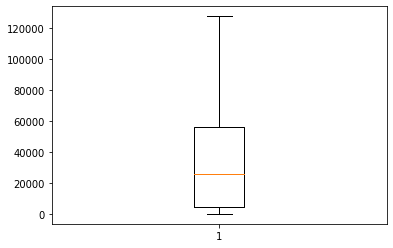

time: 387 ms (started: 2022-02-17 05:58:44 +00:00)


In [10]:
#Finding Outliers

import matplotlib.pyplot as plt
plt.boxplot(data_trip_9am_1['DL_bitrate'])
plt.show

In [11]:
Q1_9am_1_dl_bitrate = data_trip_9am_1['DL_bitrate'].quantile(0.25)
Q3_9am_1_dl_bitrate = data_trip_9am_1['DL_bitrate'].quantile(0.75)
IQR_9am_1_dl_bitrate = Q3_9am_1_dl_bitrate-Q1_9am_1_dl_bitrate
lower_bound_9am_1_dl_bitrate = Q1_9am_1_dl_bitrate-1.5*IQR_9am_1_dl_bitrate
upper_bound_9am_1_dl_bitrate = Q3_9am_1_dl_bitrate+1.5*IQR_9am_1_dl_bitrate

time: 10.5 ms (started: 2022-02-17 05:58:45 +00:00)


In [12]:
outliers_1_9am_dl_bitrate = data_trip_9am_1[data_trip_9am_1['DL_bitrate']>upper_bound_9am_1_dl_bitrate]
outliers_1_9am_dl_bitrate

Empty DataFrame
Columns: [Timestamp, Longitude, Latitude, Speed, Operator, CellID, LAC, LTERSSI, RSRP, RSRQ, SNR, DL_bitrate, UL_bitrate]
Index: []

time: 25.4 ms (started: 2022-02-17 05:58:45 +00:00)


In [13]:
Q1_9am_1_rssi = data_trip_9am_1['LTERSSI'].quantile(0.25)
Q3_9am_1_rssi = data_trip_9am_1['LTERSSI'].quantile(0.75)
IQR_9am_1_rssi = Q3_9am_1_rssi-Q1_9am_1_rssi
lower_bound_9am_1_rssi = Q1_9am_1_rssi-1.5*IQR_9am_1_rssi
upper_bound_9am_1_rssi = Q3_9am_1_rssi+1.5*IQR_9am_1_rssi

time: 14.2 ms (started: 2022-02-17 05:58:45 +00:00)


In [14]:
outliers_1_9am_rssi = data_trip_9am_1[data_trip_9am_1['LTERSSI']>upper_bound_9am_1_rssi]
outliers_1_9am_rssi

Empty DataFrame
Columns: [Timestamp, Longitude, Latitude, Speed, Operator, CellID, LAC, LTERSSI, RSRP, RSRQ, SNR, DL_bitrate, UL_bitrate]
Index: []

time: 23.1 ms (started: 2022-02-17 05:58:45 +00:00)


In [15]:
Q1_9am_1_rsrp = data_trip_9am_1['RSRP'].quantile(0.25)
Q3_9am_1_rsrp = data_trip_9am_1['RSRP'].quantile(0.75)
IQR_9am_1_rsrp = Q3_9am_1_rsrp-Q1_9am_1_rsrp
lower_bound_9am_1_rsrp = Q1_9am_1_rsrp-1.5*IQR_9am_1_rsrp
upper_bound_9am_1_rsrp = Q3_9am_1_rsrp+1.5*IQR_9am_1_rsrp

time: 35.7 ms (started: 2022-02-17 05:58:45 +00:00)


In [16]:
outliers_1_9am_rsrp = data_trip_9am_1[data_trip_9am_1['RSRP']>upper_bound_9am_1_rsrp]
outliers_1_9am_rsrp

Empty DataFrame
Columns: [Timestamp, Longitude, Latitude, Speed, Operator, CellID, LAC, LTERSSI, RSRP, RSRQ, SNR, DL_bitrate, UL_bitrate]
Index: []

time: 34.8 ms (started: 2022-02-17 05:58:45 +00:00)


In [17]:
Q1_9am_1_rsrq = data_trip_9am_1['RSRQ'].quantile(0.25)
Q3_9am_1_rsrq = data_trip_9am_1['RSRQ'].quantile(0.75)
IQR_9am_1_rsrq = Q3_9am_1_rsrq-Q1_9am_1_rsrq
lower_bound_9am_1_rsrq = Q1_9am_1_rsrq-1.5*IQR_9am_1_rsrq
upper_bound_9am_1_rsrq = Q3_9am_1_rsrq+1.5*IQR_9am_1_rsrq

time: 23.9 ms (started: 2022-02-17 05:58:45 +00:00)


In [18]:
outliers_1_9am_rsrq = data_trip_9am_1[data_trip_9am_1['RSRQ']>upper_bound_9am_1_rsrq]
outliers_1_9am_rsrq

Timestamp  Longitude   Latitude  ...   SNR  DL_bitrate  UL_bitrate
5301  2019-12-05 09:39:35  -76.56940  44.218821  ...  20.4         144        6214
5302  2019-12-05 09:39:36  -76.56940  44.218821  ...  21.0         144        6214
5303  2019-12-05 09:39:36  -76.56939  44.218741  ...  21.0         144        6214
5304  2019-12-05 09:39:36  -76.56939  44.218741  ...  21.0           7         473
5305  2019-12-05 09:39:37  -76.56939  44.218677  ...  21.0           7         473

[5 rows x 13 columns]

time: 105 ms (started: 2022-02-17 05:58:46 +00:00)


<function matplotlib.pyplot.show>

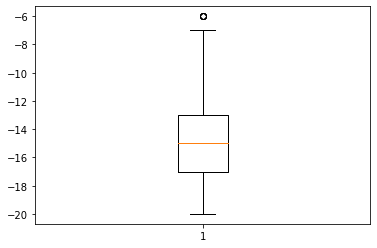

time: 347 ms (started: 2022-02-17 05:58:46 +00:00)


In [19]:
plt.boxplot(data_trip_9am_1['RSRQ'])
plt.show

In [20]:
Q1_9am_1_snr = data_trip_9am_1['SNR'].quantile(0.25)
Q3_9am_1_snr = data_trip_9am_1['SNR'].quantile(0.75)
IQR_9am_1_snr = Q3_9am_1_snr-Q1_9am_1_snr
lower_bound_9am_1_snr = Q1_9am_1_snr-1.5*IQR_9am_1_snr
upper_bound_9am_1_snr = Q3_9am_1_snr+1.5*IQR_9am_1_snr

time: 9.23 ms (started: 2022-02-17 05:58:46 +00:00)


In [21]:
outliers_1_9am_snr = data_trip_9am_1[data_trip_9am_1['SNR']>upper_bound_9am_1_snr]
outliers_1_9am_snr

Empty DataFrame
Columns: [Timestamp, Longitude, Latitude, Speed, Operator, CellID, LAC, LTERSSI, RSRP, RSRQ, SNR, DL_bitrate, UL_bitrate]
Index: []

time: 35.2 ms (started: 2022-02-17 05:58:46 +00:00)


Kesimpulan : Dilakukan pencarian outlier hanya pada data "data_trip_9am_1" pada data yang bertipe numerik saja, ditemukan outliers pada kolom "RSRQ" dimana terdapat 5 baris data merupakan outlier

In [22]:
#Removing Outlier Data
data_trip_9am_1 = data_trip_9am_1[~(data_trip_9am_1['RSRQ'] > upper_bound_9am_1_rsrq)]
print(data_trip_9am_1.shape)
data_trip_9am_1.head()

(7287, 13)


Timestamp  Longitude   Latitude  ...   SNR  DL_bitrate  UL_bitrate
0  2019-12-05 09:02:32  -76.49136  44.232045  ...  10.8          21        1231
1  2019-12-05 09:02:32  -76.49136  44.232045  ...  10.8        7651        3799
2  2019-12-05 09:02:33  -76.49147  44.232058  ...   7.2        7651        3799
3  2019-12-05 09:02:33  -76.49147  44.232058  ...   7.2       10017         448
4  2019-12-05 09:02:34  -76.49160  44.232078  ...   5.4       10017         448

[5 rows x 13 columns]

time: 208 ms (started: 2022-02-17 05:58:49 +00:00)


### Exploratory Data Analysis - Univariate Analysis

In [23]:
numerical_features = ['Longitude', 'Latitude', 'Speed', 'LTERSSI', 'RSRP', 'RSRQ', 'SNR','DL_bitrate','UL_bitrate']
categorical_features = ['Operator', 'CellID', 'LAC']

time: 4.09 ms (started: 2022-02-17 05:58:51 +00:00)


        jumlah sampel  persentase
302610           7185        98.6
302220            102         1.4


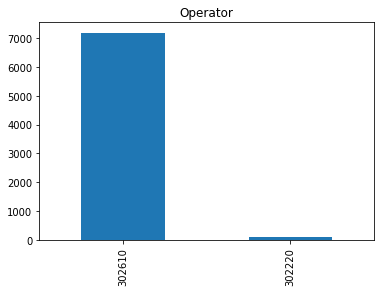

time: 288 ms (started: 2022-02-17 05:58:53 +00:00)


In [24]:
# categorical features

# Feature Operator
feature = categorical_features[0]
count = data_trip_9am_1[feature].value_counts()
percent = 100*data_trip_9am_1[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kesimpulan : Terdapat 2 kategori pada fitur Operator/Mobile Country Code, yaitu 302610 dan 30220. Dari data persentase dapat kita simpulkan bahwa lebih dari 98% sampel merupakan operator dengan nomor MCC/MNC 302610.

   jumlah sampel  persentase
3           3406        46.7
2           1613        22.1
1           1248        17.1
4           1020        14.0


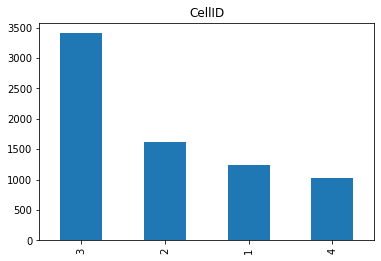

time: 393 ms (started: 2022-02-17 05:58:55 +00:00)


In [25]:
# Feature CellID
feature = categorical_features[1]
count = data_trip_9am_1[feature].value_counts()
percent = 100*data_trip_9am_1[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kesimpulan : Terdapat 4 kategori pada fitur CellID, secara berurutan dari jumlahnya yang paling banyak yaitu CellID dengan nomor: 3, 2, 1, dan 4.

       jumlah sampel  persentase
56009           7287       100.0


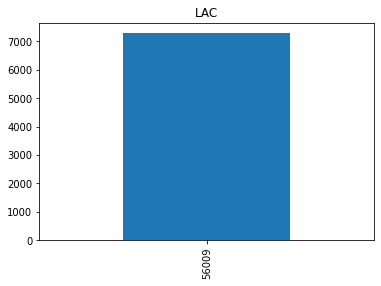

time: 312 ms (started: 2022-02-17 05:58:56 +00:00)


In [26]:
# Feature LAC
feature = categorical_features[2]
count = data_trip_9am_1[feature].value_counts()
percent = 100*data_trip_9am_1[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kesimpulan : Pada fitur LAC hanya terdapat satu kategori saja yakni kode LAC 56009 saja

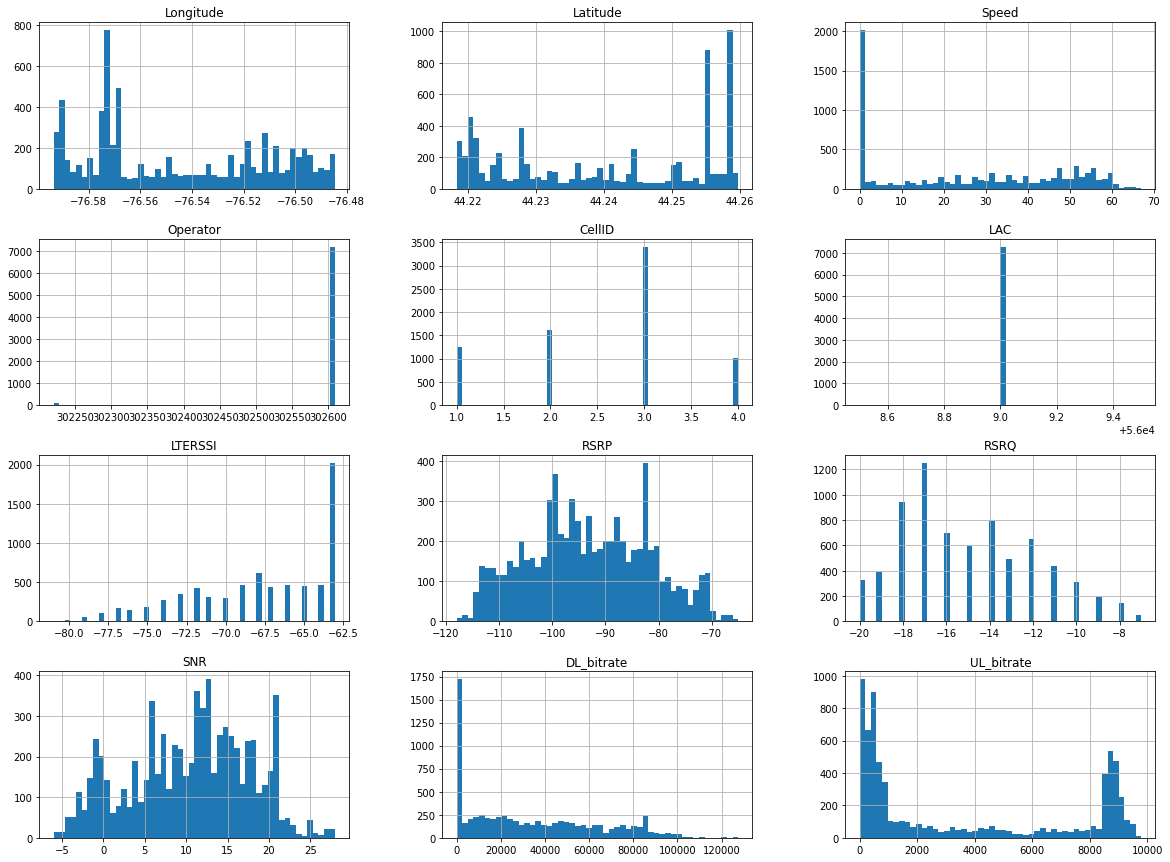

time: 6.43 s (started: 2022-02-17 05:58:57 +00:00)


In [27]:
data_trip_9am_1.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "DL_bitrate" yang merupakan fitur target (label) pada data kita. Dari histogram "DL_bitrate", kita bisa memperoleh beberapa informasi, antara lain:



*   Terdapat banyak data dengan nilai '0' pada kolom "DL_bitrate"
*   Distribusi masih belum terlihat, mungkin akan lebih terlihat apabila nilai '0' kita hilangkan dari data




In [28]:
#Check Data Skewness
data_trip_9am_1.skew().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


DL_bitrate    0.571239
UL_bitrate    0.485913
RSRQ          0.437299
Longitude     0.262052
RSRP          0.095874
Speed         0.036759
LAC           0.000000
Latitude     -0.070882
SNR          -0.181284
CellID       -0.338586
LTERSSI      -0.650033
Operator     -8.275480
dtype: float64

time: 27.7 ms (started: 2022-02-17 05:59:03 +00:00)


Conclusion :
*   If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
*   If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
*   If the skewness is less than -1 or greater than 1, the data are highly skewed

From the following data, we notice that LTERSSI and DL_bitrate categorized as moderately skewed. We didn't notice Operator because it wasn't numerical features

In [29]:
# Count Nilai 0 pada kolom Speed, Downlink Bitrate, dan Uplink Bitrate

x = (data_trip_9am_1.Speed == 0).sum()
y = (data_trip_9am_1.DL_bitrate == 0).sum()
z = (data_trip_9am_1.UL_bitrate == 0).sum()
 
print("Nilai 0 di kolom Speed ada: ", x)
print("Nilai 0 di kolom DL_bitrate ada: ", y)
print("Nilai 0 di kolom UL_bitrate ada: ", z)

Nilai 0 di kolom Speed ada:  1944
Nilai 0 di kolom DL_bitrate ada:  314
Nilai 0 di kolom UL_bitrate ada:  416
time: 23.5 ms (started: 2022-02-17 05:59:03 +00:00)


In [30]:
data_trip_9am_1.loc[(data_trip_9am_1['Speed']==0)]

Timestamp  Longitude   Latitude  ...   SNR  DL_bitrate  UL_bitrate
273   2019-12-05 09:04:27  -76.50038  44.236519  ...  12.4       41633        8892
274   2019-12-05 09:04:27  -76.50038  44.236519  ...  12.4       47092        8739
275   2019-12-05 09:04:28  -76.50038  44.236516  ...  12.4       47092        8739
276   2019-12-05 09:04:28  -76.50038  44.236516  ...  12.4       47092        8739
277   2019-12-05 09:04:28  -76.50038  44.236516  ...  12.4       47092        8739
...                   ...        ...        ...  ...   ...         ...         ...
6842  2019-12-05 09:50:19  -76.49477  44.224309  ...  18.2       43952        9001
7288  2019-12-05 09:53:27  -76.48474  44.231050  ...  -0.8       21320         311
7289  2019-12-05 09:53:27  -76.48474  44.231050  ...  -0.8       21320         311
7290  2019-12-05 09:53:28  -76.48474  44.231050  ...  -0.8          90        5038
7291  2019-12-05 09:53:28  -76.48474  44.231050  ...  -0.8          90        5038

[1944 rows x 13 columns]

time: 73.6 ms (started: 2022-02-17 05:59:03 +00:00)


In [31]:
data_trip_9am_1 = data_trip_9am_1.loc[(data_trip_9am_1[['DL_bitrate','UL_bitrate']]!=0).all(axis=1)]
data_trip_9am_1.shape
dt = data_trip_9am_1.loc[(data_trip_9am_1[['DL_bitrate','UL_bitrate']]!=0).all(axis=1)]

time: 25.9 ms (started: 2022-02-17 05:59:05 +00:00)


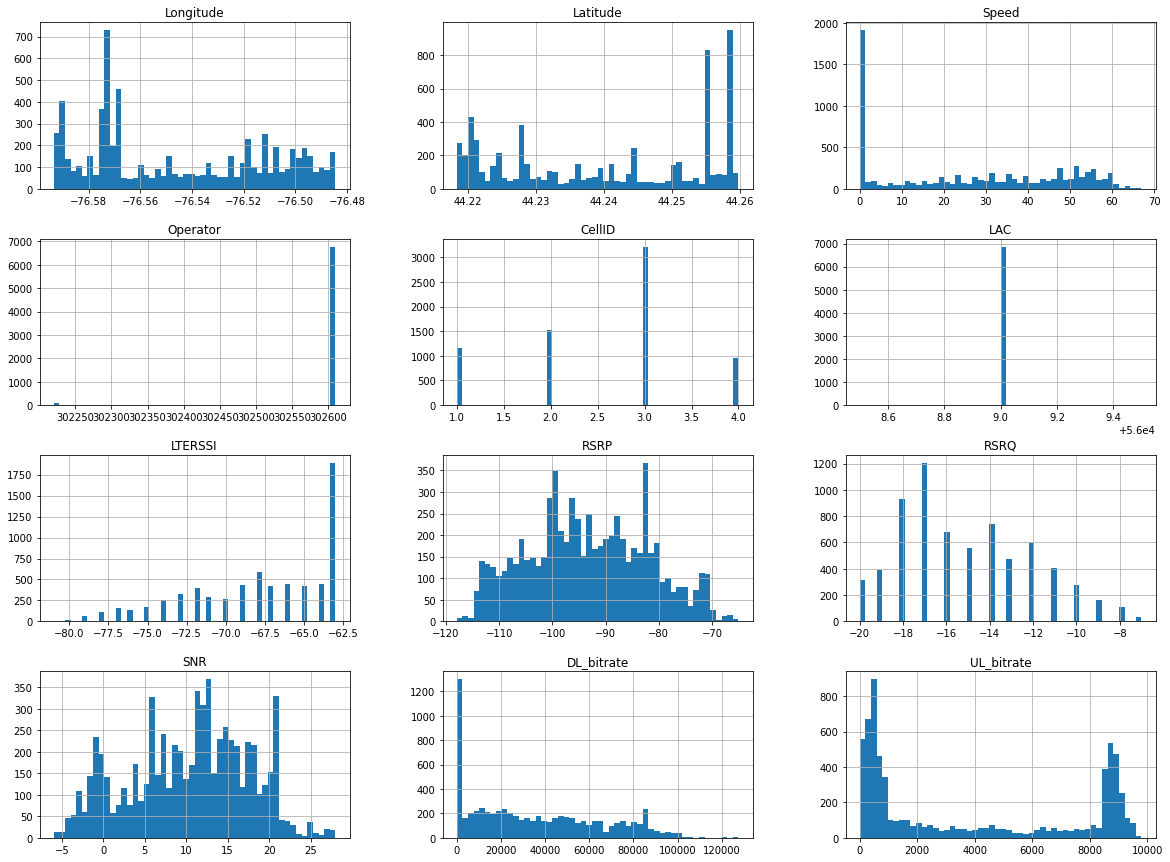

time: 5.31 s (started: 2022-02-17 05:59:05 +00:00)


In [32]:
dt.hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
data_trip_9am_1.describe()

Longitude     Latitude  ...     DL_bitrate   UL_bitrate
count  6865.000000  6865.000000  ...    6865.000000  6865.000000
mean    -76.545352    44.239946  ...   35242.499053  3864.992862
std       0.034182     0.014566  ...   29774.449637  3668.548183
min     -76.593640    44.218345  ...       1.000000     1.000000
25%     -76.572330    44.225193  ...    8273.000000   493.000000
50%     -76.553590    44.240641  ...   29184.000000  2029.000000
75%     -76.512170    44.255001  ...   57907.000000  8527.000000
max     -76.484430    44.259746  ...  127567.000000  9797.000000

[8 rows x 12 columns]

time: 104 ms (started: 2022-02-17 05:59:18 +00:00)


Kesimpulan : Dikarenakan total missing value yang ditemukan mencapai 1944 baris, maka jumlah ini cukup besar dibandingkan dengan data yang kita miliki sebanyak 7292 baris. Apabila kita menghapus data tersebut akan sangat banyak data yang hilang. Oleh karena itu, kita biarkan datanya terlebih dahulu

### Exploratory Data Analysis - Multivariate  Analysis



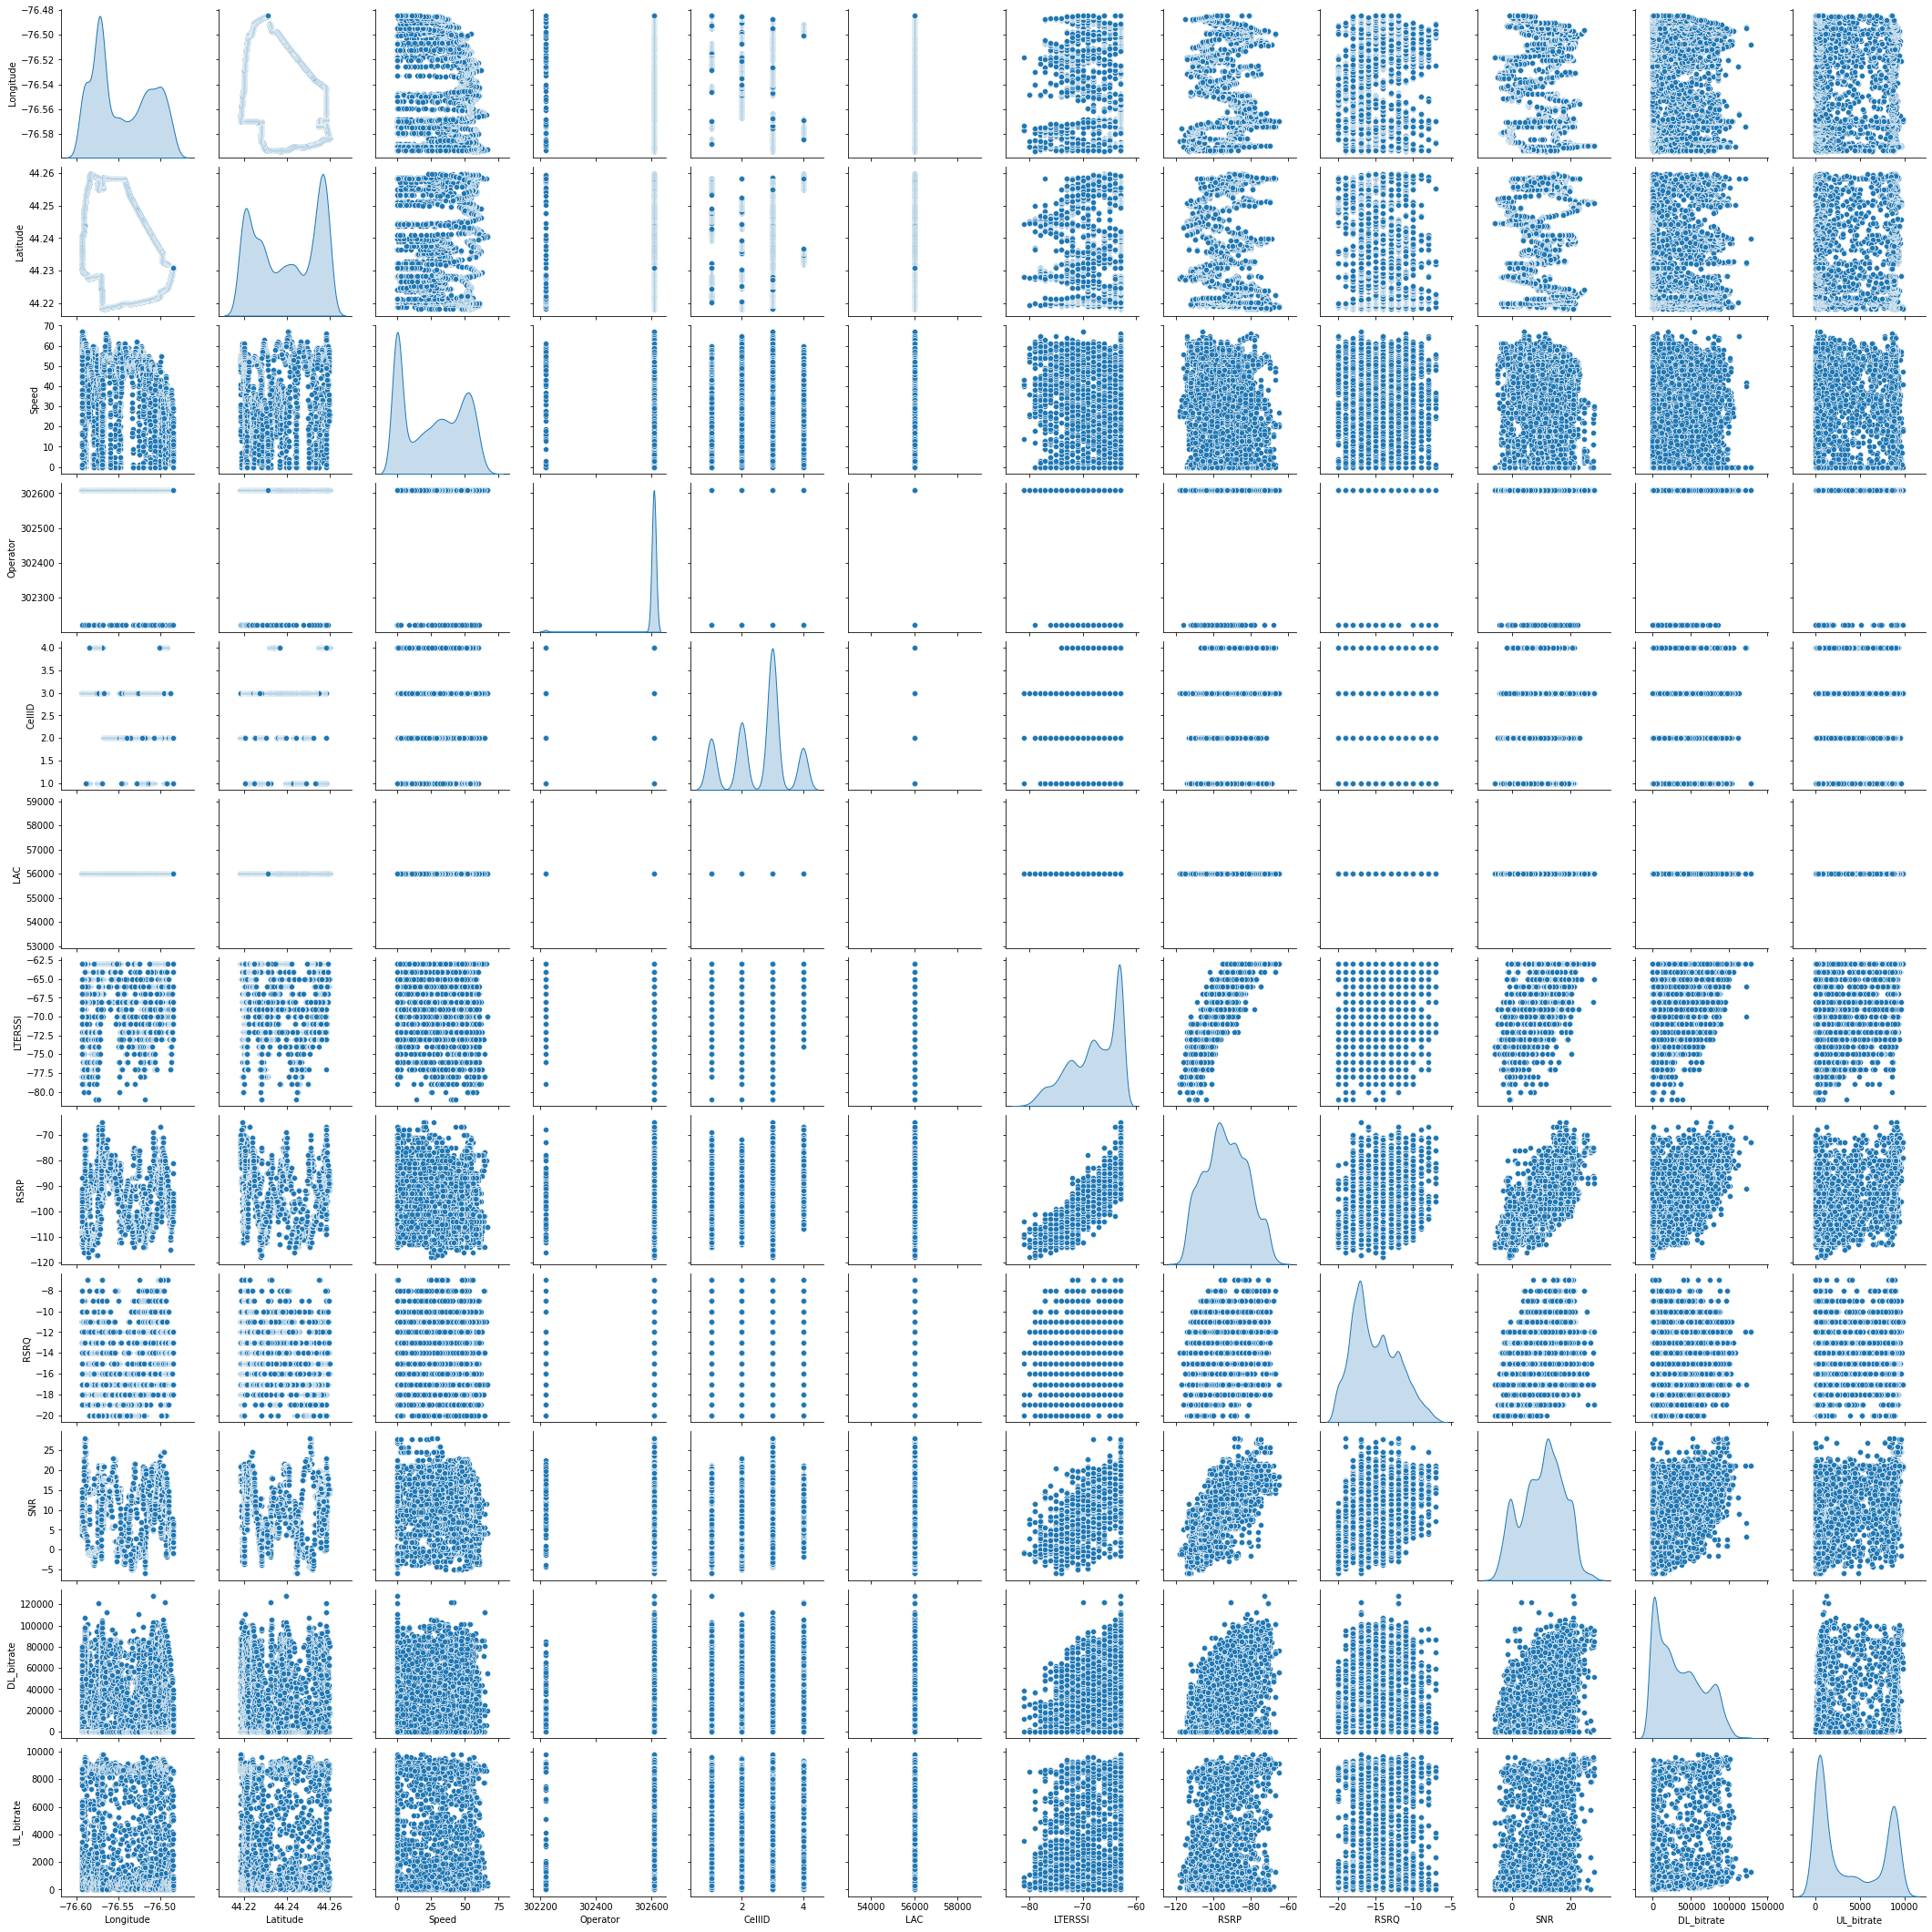

time: 2min 14s (started: 2022-02-17 05:59:23 +00:00)


In [34]:
# Numerical Features
sns.pairplot(data_trip_9am_1, diag_kind = 'kde')

Kesimpulan : Berdasarkan plot grafik korelasi diatas terhadap target, yakni "Downlink Bitrate" dapat dilihat bahwa tidak terdapat kolom dengan relasi yang kuat dibandingkan dengan target

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

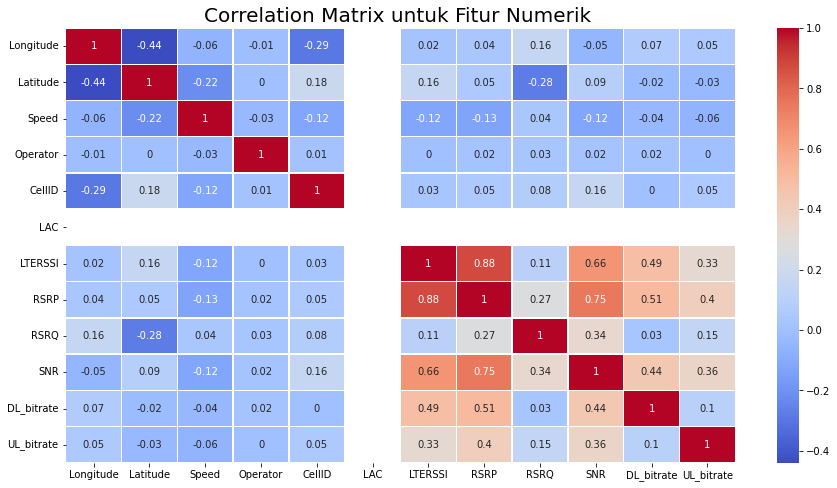

time: 1.15 s (started: 2022-02-17 06:01:37 +00:00)


In [35]:
# Correlation Score
plt.figure(figsize=(15, 8))
correlation_matrix = data_trip_9am_1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


Kesimpulan : Dikarenakan tidak terdapat fitur dengan korelasi yang kuat dengan target, maka kita drop fitur dengan korelasi yang sangat lemah yakni fitur Longitude, Latitude, Speed, Operator, CellID, LAC, RSRQ, dan UL_bitrate

In [44]:
df_featureselection = data_trip_9am_1.copy()
df_featureselection.drop(['Longitude','Latitude','Speed','Operator','CellID','LAC','RSRQ','UL_bitrate'], inplace=True, axis=1)
df_featureselection.head()

Timestamp  LTERSSI  RSRP   SNR  DL_bitrate
0  2019-12-05 09:02:32      -66   -84  10.8          21
1  2019-12-05 09:02:32      -66   -84  10.8        7651
2  2019-12-05 09:02:33      -66   -84   7.2        7651
3  2019-12-05 09:02:33      -66   -94   7.2       10017
4  2019-12-05 09:02:34      -66   -94   5.4       10017

time: 49.2 ms (started: 2022-02-17 06:03:36 +00:00)


In [45]:
data_trip_9am_1 = data_trip_9am_1.loc[(data_trip_9am_1[['DL_bitrate']]!=0).all(axis=1)]
data_trip_9am_1.shape 

(6865, 13)

time: 22.3 ms (started: 2022-02-17 06:03:42 +00:00)


In [46]:
y = (data_trip_9am_1.DL_bitrate == 0).sum()
print("Nilai 0 di kolom DL_bitrate ada: ", y)

Nilai 0 di kolom DL_bitrate ada:  0
time: 17.1 ms (started: 2022-02-17 06:03:44 +00:00)


# Data Preparation

### Dimension Reduction with PCA

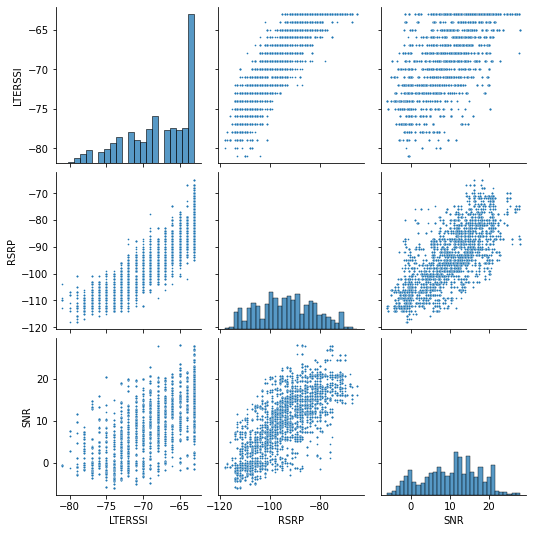

time: 6.98 s (started: 2022-02-17 06:03:46 +00:00)


In [47]:
# Dimension Reduction with PCA
sns.pairplot(data_trip_9am_1[['LTERSSI','RSRP','SNR']], plot_kws={"s": 3});

In this case, the parameters that we enter into the class are **n_components and random_state**. The parameter **n_components is the number of components or dimensions, in our case there are 3, namely 'LTERSSI', 'RSRP', and 'SNR'.**

Meanwhile, **the random_state parameter functions to control the random number generator used**. This parameter is an integer and the value is independent. In this case, **we apply random_state = 123**. Whatever integer value we specify as long as it is an integer, it will return the same result every time we call the function (in our case, class PCA).

Specifying the random_state parameter aims **to ensure that the results of dividing the dataset are consistent and provide the same data every time the model is run**. If not specified, then every time we do a split, we will get different train and test data. This affects the accuracy of the ML model which is different every time it is run.

In [50]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(df_featureselection[['LTERSSI','RSRP','SNR']])
princ_comp = pca.transform(df_featureselection[['LTERSSI','RSRP','SNR']])

time: 73.3 ms (started: 2022-02-17 06:04:33 +00:00)


In [51]:
pca.explained_variance_ratio_.round(3)

array([0.887, 0.093, 0.02 ])

time: 24.5 ms (started: 2022-02-17 06:04:42 +00:00)



Conclusion: 88.7% of the information on the three features 'LTERSSI', 'RSRP', 'SNR' is on the first PC. While the rest, 9.3% and 2.1% are on the second and third PCs. When you pay attention, the number is > 100%. This is due to the rounding process in 3 decimal places, so we don't have to worry.

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
df_pca=df_featureselection.copy()
pca.fit(df_pca[['LTERSSI','RSRP','SNR']])
df_pca['performance'] = pca.transform(df_pca.loc[:, ('LTERSSI','RSRP','SNR')]).flatten()
df_pca.drop(['LTERSSI','RSRP','SNR'], axis=1, inplace=True)

time: 90.7 ms (started: 2022-02-17 06:04:46 +00:00)


Based on these results, we will reduce the features (performance) and keep only the first PC (component). This first PC will be a network performance or size feature replacing the other three features ('LTERSSI', 'RSRP', 'SNR'). We name this feature 'Performance'.

In [53]:
df_pca

Timestamp  DL_bitrate  performance
0     2019-12-05 09:02:32          21    -8.551936
1     2019-12-05 09:02:32        7651    -8.551936
2     2019-12-05 09:02:33        7651    -6.911024
3     2019-12-05 09:02:33       10017     1.461663
4     2019-12-05 09:02:34       10017     2.282119
...                   ...         ...          ...
7287  2019-12-05 09:53:26       21320     7.386722
7288  2019-12-05 09:53:27       21320     7.386722
7289  2019-12-05 09:53:27       21320     7.386722
7290  2019-12-05 09:53:28          90     9.061260
7291  2019-12-05 09:53:28          90     9.061260

[6865 rows x 3 columns]

time: 49.8 ms (started: 2022-02-17 06:04:51 +00:00)


Because the model cannot process the timestamp column because it cannot convert its data type to a float data type. We need to change the data type first to a datetime data type, and then divide it into separate sections between hours, minutes, seconds, days, months, and years.

In [54]:
data_trip_9am_1['Timestamp'] = pd.to_datetime(data_trip_9am_1['Timestamp'], errors="coerce")
df_featureselection['Timestamp'] = pd.to_datetime(df_featureselection['Timestamp'], errors="coerce")
df_pca['Timestamp'] = pd.to_datetime(df_pca['Timestamp'], errors="coerce")

time: 36.8 ms (started: 2022-02-17 06:05:02 +00:00)


In [55]:
import datetime
from datetime import datetime, timedelta
def posix_time(dt):
                return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

time: 2.9 ms (started: 2022-02-17 06:05:09 +00:00)


In [56]:
data_trip_9am_1['Timestamp'] = pd.to_datetime(data_trip_9am_1['Timestamp']).apply(posix_time)
df_featureselection['Timestamp'] = pd.to_datetime(df_featureselection['Timestamp']).apply(posix_time)
df_pca['Timestamp'] = pd.to_datetime(df_pca['Timestamp']).apply(posix_time)

time: 764 ms (started: 2022-02-17 06:05:10 +00:00)


In [57]:
Table = data_trip_9am_1.set_index('Timestamp')
Table1 = df_featureselection.set_index('Timestamp')
Table2 = df_pca.set_index('Timestamp')

time: 6.24 ms (started: 2022-02-17 06:05:11 +00:00)


### Train-Test Split

Pada penelitian ini, kita akan menggunakan proporsi pembagian sebesar 80:20; 70:30; dan 90:10 dengan fungsi train_test_split dari sklearn

In [58]:
from sklearn.model_selection import train_test_split
training_data1, testing_data1 = train_test_split(Table, test_size=0.3)
print(f"No. of training examples: {training_data1.shape[0]}")
print(f"No. of testing examples: {testing_data1.shape[0]}")

No. of training examples: 4805
No. of testing examples: 2060
time: 18.1 ms (started: 2022-02-17 06:07:39 +00:00)


In [59]:
training_data2, testing_data2 = train_test_split(Table, test_size=0.2)
training_data3, testing_data3 = train_test_split(Table, test_size=0.1)

time: 21.8 ms (started: 2022-02-17 06:07:39 +00:00)


In [60]:
#train-split data for feature selection dataframe
training_data1_fs, testing_data1_fs = train_test_split(Table1, test_size=0.3)
training_data2_fs, testing_data2_fs = train_test_split(Table1, test_size=0.2)
training_data3_fs, testing_data3_fs = train_test_split(Table1, test_size=0.1)

time: 35.7 ms (started: 2022-02-17 06:07:40 +00:00)


In [61]:
#train-split data for PCA dataframe
training_data1_pca, testing_data1_pca = train_test_split(Table2, test_size=0.3)
training_data2_pca, testing_data2_pca = train_test_split(Table2, test_size=0.2)
training_data3_pca, testing_data3_pca = train_test_split(Table2, test_size=0.1)

time: 14.9 ms (started: 2022-02-17 06:07:40 +00:00)


In [62]:
x_train1, y_train1 = training_data1.drop("DL_bitrate", axis=1), training_data1['DL_bitrate']
x_test1, y_test1   = testing_data1.drop("DL_bitrate", axis=1) , testing_data1['DL_bitrate']
x_train2, y_train2 = training_data2.drop("DL_bitrate", axis=1), training_data2['DL_bitrate']
x_test2, y_test2   = testing_data2.drop("DL_bitrate", axis=1) , testing_data2['DL_bitrate']
x_train3, y_train3 = training_data3.drop("DL_bitrate", axis=1), training_data3['DL_bitrate']
x_test3, y_test3   = testing_data3.drop("DL_bitrate", axis=1) , testing_data3['DL_bitrate']

time: 23.1 ms (started: 2022-02-17 06:07:40 +00:00)


In [63]:
x_train1_fs, y_train1_fs = training_data1_fs.drop("DL_bitrate", axis=1), training_data1_fs['DL_bitrate']
x_test1_fs, y_test1_fs   = testing_data1_fs.drop("DL_bitrate", axis=1) , testing_data1_fs['DL_bitrate']
x_train2_fs, y_train2_fs = training_data2_fs.drop("DL_bitrate", axis=1), training_data2_fs['DL_bitrate']
x_test2_fs, y_test2_fs   = testing_data2_fs.drop("DL_bitrate", axis=1) , testing_data2_fs['DL_bitrate']
x_train3_fs, y_train3_fs = training_data3_fs.drop("DL_bitrate", axis=1), training_data3_fs['DL_bitrate']
x_test3_fs, y_test3_fs   = testing_data3_fs.drop("DL_bitrate", axis=1) , testing_data3_fs['DL_bitrate']

time: 16.7 ms (started: 2022-02-17 06:07:41 +00:00)


In [64]:
x_train1_pca, y_train1_pca = training_data1_pca.drop("DL_bitrate", axis=1), training_data1_pca['DL_bitrate']
x_test1_pca, y_test1_pca   = testing_data1_pca.drop("DL_bitrate", axis=1) , testing_data1_pca['DL_bitrate']
x_train2_pca, y_train2_pca = training_data2_pca.drop("DL_bitrate", axis=1), training_data2_pca['DL_bitrate']
x_test2_pca, y_test2_pca   = testing_data2_pca.drop("DL_bitrate", axis=1) , testing_data2_pca['DL_bitrate']
x_train3_pca, y_train3_pca = training_data3_pca.drop("DL_bitrate", axis=1), training_data3_pca['DL_bitrate']
x_test3_pca, y_test3_pca   = testing_data3_pca.drop("DL_bitrate", axis=1) , testing_data3_pca['DL_bitrate']

time: 21.8 ms (started: 2022-02-17 06:07:41 +00:00)


### Standardization

**Why not do some scaling first instead of train-test split?**

So far, the mistake that machine learning practitioners often make is to perform scaling processes such as normalization and standardization before dividing the data into training data and test data. This has the **potential to cause data leakage**. The scaling process on the entire dataset makes the model have information about the distribution of the test data. Information about test data (which the model should not see) is also included in the training data transformation process. Therefore, **we will do the scaling process separately between training data and test data**.

**StandardScaler** performs a feature standardization process by subtracting the mean (mean value) and then dividing by the standard deviation to shift the distribution. StandardScaler returns a distribution with a standard deviation equal to 1 and a mean equal to 0. Approximately 68% of the values will be between -1 and 1

In [65]:
from sklearn.preprocessing import StandardScaler
 
numerical_features1 = ['Longitude', 'Latitude', 'Speed', 'LTERSSI', 'RSRP', 'RSRQ', 'SNR','UL_bitrate']
scaler = StandardScaler()

time: 9.12 ms (started: 2022-02-17 06:07:41 +00:00)


In [66]:
scaler.fit(x_train1[numerical_features1])
x_train1[numerical_features1] = scaler.transform(x_train1.loc[:, numerical_features1])
x_train1[numerical_features1].head()
scaler.fit(x_train2[numerical_features1])
x_train2[numerical_features1] = scaler.transform(x_train2.loc[:, numerical_features1])
x_train2[numerical_features1].head()
scaler.fit(x_train3[numerical_features1])
x_train3[numerical_features1] = scaler.transform(x_train3.loc[:, numerical_features1])
x_train3[numerical_features1].head()

Longitude  Latitude     Speed  ...      RSRQ       SNR  UL_bitrate
Timestamp                                    ...                                
1.575539e+09  -0.860480 -0.811795 -1.082580  ... -1.633120 -1.415341   -0.932817
1.575538e+09  -1.117491  1.359525 -0.164454  ...  0.358212  0.506920    1.343765
1.575539e+09  -1.061898 -0.836589  0.891390  ...  0.690100 -1.498918    0.219251
1.575538e+09  -0.833411  1.264551 -1.220299  ...  1.021989  0.813368   -0.672558
1.575539e+09  -0.709999 -1.172752  1.166828  ...  0.026323  0.646215    0.670475

[5 rows x 8 columns]

time: 118 ms (started: 2022-02-17 06:07:41 +00:00)


In [68]:
#standardization for feature selection dataframe
numerical_features2 = ['LTERSSI', 'RSRP', 'SNR']
scaler.fit(x_train1_fs[numerical_features2])
x_train1_fs[numerical_features2] = scaler.transform(x_train1_fs.loc[:, numerical_features2])
x_train1_fs[numerical_features2].head()
scaler.fit(x_train2_fs[numerical_features2])
x_train2_fs[numerical_features2] = scaler.transform(x_train2_fs.loc[:, numerical_features2])
x_train2_fs[numerical_features2].head()
scaler.fit(x_train3_fs[numerical_features2])
x_train3_fs[numerical_features2] = scaler.transform(x_train3_fs.loc[:, numerical_features2])
x_train3_fs[numerical_features2].head()

LTERSSI      RSRP       SNR
Timestamp                                 
1.575538e+09  0.400444  0.294118  0.700394
1.575537e+09  1.065543  0.382630 -0.718279
1.575539e+09 -0.042955  0.117094  0.450040
1.575537e+09 -0.929753 -1.387609 -1.664061
1.575537e+09  0.400444  0.382630  0.088418

time: 69.8 ms (started: 2022-02-17 06:07:51 +00:00)


In [69]:
#standardization for feature selection dataframe
numerical_features3 = ['performance']
scaler.fit(x_train1_pca[numerical_features3])
x_train1_pca[numerical_features3] = scaler.transform(x_train1_pca.loc[:, numerical_features3])
x_train1_pca[numerical_features3].head()
scaler.fit(x_train2_pca[numerical_features3])
x_train2_pca[numerical_features3] = scaler.transform(x_train2_pca.loc[:, numerical_features3])
x_train2_pca[numerical_features3].head()
scaler.fit(x_train3_pca[numerical_features3])
x_train3_pca[numerical_features3] = scaler.transform(x_train3_pca.loc[:, numerical_features3])
x_train3_pca[numerical_features3].head()

performance
Timestamp                
1.575539e+09     1.516213
1.575539e+09     1.650273
1.575539e+09    -1.030329
1.575539e+09     1.554287
1.575538e+09     0.417681

time: 50.2 ms (started: 2022-02-17 06:07:54 +00:00)


In [70]:
x_train1[numerical_features1].describe().round(4)

Longitude   Latitude      Speed  ...       RSRQ        SNR  UL_bitrate
count  4805.0000  4805.0000  4805.0000  ...  4805.0000  4805.0000   4805.0000
mean      0.0000     0.0000     0.0000  ...    -0.0000     0.0000      0.0000
std       1.0001     1.0001     1.0001  ...     1.0001     1.0001      1.0001
min      -1.4177    -1.4824    -1.2090  ...    -1.6157    -2.2621     -1.0472
25%      -0.7928    -1.0111    -1.2090  ...    -0.6290    -0.6807     -0.9142
50%      -0.2438     0.0390     0.0351  ...    -0.3000     0.1238     -0.4948
75%       0.9703     1.0366     0.9567  ...     0.6867     0.7342      1.2839
max       1.7834     1.3627     1.8782  ...     2.6603     2.4543      1.6343

[8 rows x 8 columns]

time: 93.6 ms (started: 2022-02-17 06:07:55 +00:00)


In [71]:
x_train1_fs[numerical_features2].describe().round(4)

LTERSSI       RSRP        SNR
count  4805.0000  4805.0000  4805.0000
mean     -0.0000     0.0000    -0.0000
std       1.0001     1.0001     1.0001
min      -2.9247    -2.1740    -2.2785
25%      -0.7094    -0.7645    -0.6903
50%       0.1767    -0.0597     0.1177
75%       1.0628     0.7332     0.7307
max       1.0628     2.4951     2.4582

time: 57.8 ms (started: 2022-02-17 06:07:58 +00:00)


In [72]:
x_train1_pca[numerical_features3].describe().round(4)

performance
count    4805.0000
mean       -0.0000
std         1.0001
min        -2.1726
25%        -0.7815
50%        -0.0393
75%         0.7225
max         2.2423

time: 23.4 ms (started: 2022-02-17 06:08:00 +00:00)


As previously mentioned, the standardization process changes the mean value (mean) to 0 and the standard deviation value to 1

# Model Development

### Model Development with K-Nearest Neighbor 

We try with a value of k=5,13, and 17 for the K-Nearest Neighbor model

In [73]:
from sklearn.neighbors import KNeighborsRegressor

time: 60.5 ms (started: 2022-02-17 06:08:15 +00:00)


We try with a value of k=5 for the K-Nearest Neighbor model (default dataframe) with train-test split 80:20

In [74]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(x_train1, y_train1)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.020494937896728516
time: 38.6 ms (started: 2022-02-17 06:08:17 +00:00)


We try with a value of k=13 for the K-Nearest Neighbor model (default dataframe) with train-test split 80:20

In [75]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=13)
knn2.fit(x_train1, y_train1)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.03236508369445801
time: 39.9 ms (started: 2022-02-17 06:08:18 +00:00)


We try with a value of k=17 for the K-Nearest Neighbor model (default dataframe) with train-test split 80:20

In [76]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn3 = KNeighborsRegressor(n_neighbors=17)
knn3.fit(x_train1, y_train1)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.019153118133544922
time: 32.3 ms (started: 2022-02-17 06:08:18 +00:00)


In [77]:
from sklearn.metrics import mean_squared_error
knn_mse_1 = pd.DataFrame(columns=['train', 'test'], index=['k=5','k=13','k=17'])

knn_mse_1.loc['k=5', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1, y_pred=knn1.predict(x_train1)))
knn_mse_1.loc['k=5', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn1.predict(x_test1)))
knn_mse_1.loc['k=13', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1, y_pred=knn2.predict(x_train1)))
knn_mse_1.loc['k=13', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn2.predict(x_test1)))
knn_mse_1.loc['k=17', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1, y_pred=knn3.predict(x_train1)))
knn_mse_1.loc['k=17', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn3.predict(x_test1)))

knn_mse_1

train          test
k=5   16122.897403  36967.063288
k=13  20423.253263   36796.95256
k=17   21194.52181  38865.216201

time: 2.15 s (started: 2022-02-17 06:08:19 +00:00)


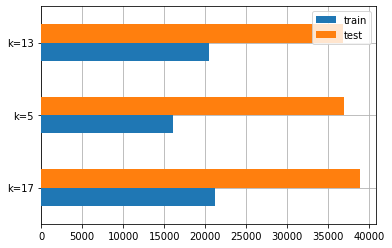

time: 356 ms (started: 2022-02-17 06:08:21 +00:00)


In [78]:
fig, ax = plt.subplots()
knn_mse_1.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [79]:
from sklearn.metrics import r2_score
knn_r2_1 = pd.DataFrame(columns=['train', 'test'], index=['k=5','k=13','k=17'])

knn_r2_1.loc['k=5', 'train'] = r2_score(y_true=y_train1, y_pred=knn1.predict(x_train1)).round(2)
knn_r2_1.loc['k=5', 'test'] = r2_score(y_true=y_test1, y_pred=knn1.predict(x_test1)).round(2)
knn_r2_1.loc['k=13', 'train'] = r2_score(y_true=y_train1, y_pred=knn2.predict(x_train1)).round(2)
knn_r2_1.loc['k=13', 'test'] = r2_score(y_true=y_test1, y_pred=knn2.predict(x_test1)).round(2)
knn_r2_1.loc['k=17', 'train'] = r2_score(y_true=y_train1, y_pred=knn3.predict(x_train1)).round(2)
knn_r2_1.loc['k=17', 'test'] = r2_score(y_true=y_test1, y_pred=knn3.predict(x_test1)).round(2)

knn_r2_1

train  test
k=5    0.7 -0.49
k=13  0.52 -0.48
k=17  0.49 -0.65

time: 2.72 s (started: 2022-02-17 06:08:21 +00:00)


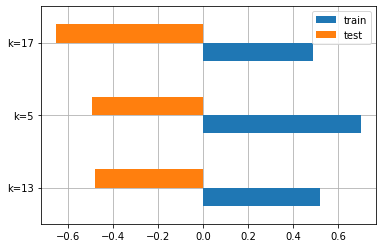

time: 318 ms (started: 2022-02-17 06:08:24 +00:00)


In [80]:
fig, ax = plt.subplots()
knn_r2_1.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

We try with a value of k=5 for the K-Nearest Neighbor model (default dataframe) with train-test split 70:30

In [81]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.013867855072021484
time: 21.9 ms (started: 2022-02-17 06:08:24 +00:00)


We try with a value of k=13 for the K-Nearest Neighbor model (default dataframe) with train-test split 70:30

In [82]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=13)
knn2.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.01356196403503418
time: 22.8 ms (started: 2022-02-17 06:08:24 +00:00)


We try with a value of k=17 for the K-Nearest Neighbor model (default dataframe) with train-test split 70:30

In [83]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn3 = KNeighborsRegressor(n_neighbors=17)
knn3.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.01745319366455078
time: 27.8 ms (started: 2022-02-17 06:08:24 +00:00)


In [84]:
from sklearn.metrics import mean_squared_error
knn_mse_2 = pd.DataFrame(columns=['train', 'test'], index=['k=5','k=13','k=17'])

knn_mse_2.loc['k=5', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=knn1.predict(x_train2)))
knn_mse_2.loc['k=5', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=knn1.predict(x_test2)))
knn_mse_2.loc['k=13', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=knn2.predict(x_train2)))
knn_mse_2.loc['k=13', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=knn2.predict(x_test2)))
knn_mse_2.loc['k=17', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=knn3.predict(x_train2)))
knn_mse_2.loc['k=17', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=knn3.predict(x_test2)))

knn_mse_2

train          test
k=5   15623.647792   36405.57447
k=13  19990.244482  39026.939644
k=17  20677.559212  40431.146984

time: 2.25 s (started: 2022-02-17 06:08:24 +00:00)


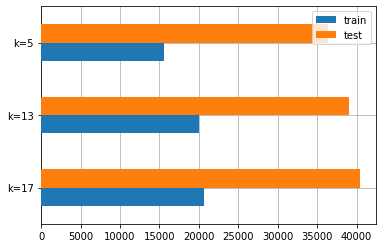

time: 378 ms (started: 2022-02-17 06:08:27 +00:00)


In [85]:
fig, ax = plt.subplots()
knn_mse_2.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [86]:
knn_r2_2 = pd.DataFrame(columns=['train', 'test'], index=['k=5','k=13','k=17'])

knn_r2_2.loc['k=5', 'train'] = r2_score(y_true=y_train2, y_pred=knn1.predict(x_train2)).round(2)
knn_r2_2.loc['k=5', 'test'] = r2_score(y_true=y_test2, y_pred=knn1.predict(x_test2)).round(2)
knn_r2_2.loc['k=13', 'train'] = r2_score(y_true=y_train2, y_pred=knn2.predict(x_train2)).round(2)
knn_r2_2.loc['k=13', 'test'] = r2_score(y_true=y_test2, y_pred=knn2.predict(x_test2)).round(2)
knn_r2_2.loc['k=17', 'train'] = r2_score(y_true=y_train2, y_pred=knn3.predict(x_train2)).round(2)
knn_r2_2.loc['k=17', 'test'] = r2_score(y_true=y_test2, y_pred=knn3.predict(x_test2)).round(2)

knn_r2_2

train  test
k=5   0.72 -0.42
k=13  0.54 -0.63
k=17  0.51 -0.75

time: 2.18 s (started: 2022-02-17 06:08:27 +00:00)


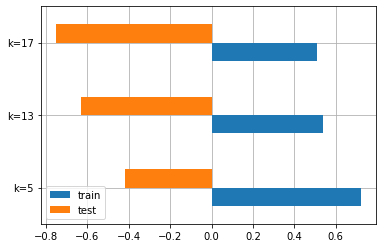

time: 377 ms (started: 2022-02-17 06:08:29 +00:00)


In [87]:
fig, ax = plt.subplots()
knn_r2_2.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [88]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(x_train3, y_train3)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.018302202224731445
time: 34.6 ms (started: 2022-02-17 06:08:30 +00:00)


In [89]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=13)
knn2.fit(x_train3, y_train3)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.01507711410522461
time: 31.8 ms (started: 2022-02-17 06:08:30 +00:00)


In [90]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn3 = KNeighborsRegressor(n_neighbors=17)
knn3.fit(x_train3, y_train3)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.015969038009643555
time: 29 ms (started: 2022-02-17 06:08:30 +00:00)


In [91]:
knn_mse_3 = pd.DataFrame(columns=['train', 'test'], index=['k=5','k=13','k=17'])

knn_mse_3.loc['k=5', 'train'] = np.sqrt(mean_squared_error(y_true=y_train3, y_pred=knn1.predict(x_train3)))
knn_mse_3.loc['k=5', 'test'] = np.sqrt(mean_squared_error(y_true=y_test3, y_pred=knn1.predict(x_test3)))
knn_mse_3.loc['k=13', 'train'] = np.sqrt(mean_squared_error(y_true=y_train3, y_pred=knn2.predict(x_train3)))
knn_mse_3.loc['k=13', 'test'] = np.sqrt(mean_squared_error(y_true=y_test3, y_pred=knn2.predict(x_test3)))
knn_mse_3.loc['k=17', 'train'] = np.sqrt(mean_squared_error(y_true=y_train3, y_pred=knn3.predict(x_train3)))
knn_mse_3.loc['k=17', 'test'] = np.sqrt(mean_squared_error(y_true=y_test3, y_pred=knn3.predict(x_test3)))

knn_mse_3

train          test
k=5   14808.297611  37223.062101
k=13  19770.828062  37580.351704
k=17  20620.658056  39441.119289

time: 2.2 s (started: 2022-02-17 06:08:30 +00:00)


In [92]:
knn_r2_3 = pd.DataFrame(columns=['train', 'test'], index=['k=5','k=13','k=17'])

knn_r2_3.loc['k=5', 'train'] = r2_score(y_true=y_train3, y_pred=knn1.predict(x_train3)).round(2)
knn_r2_3.loc['k=5', 'test'] = r2_score(y_true=y_test3, y_pred=knn1.predict(x_test3)).round(2)
knn_r2_3.loc['k=13', 'train'] = r2_score(y_true=y_train3, y_pred=knn2.predict(x_train3)).round(2)
knn_r2_3.loc['k=13', 'test'] = r2_score(y_true=y_test3, y_pred=knn2.predict(x_test3)).round(2)
knn_r2_3.loc['k=17', 'train'] = r2_score(y_true=y_train3, y_pred=knn3.predict(x_train3)).round(2)
knn_r2_3.loc['k=17', 'test'] = r2_score(y_true=y_test3, y_pred=knn3.predict(x_test3)).round(2)

knn_r2_3

train  test
k=5   0.75 -0.56
k=13  0.56 -0.59
k=17  0.52 -0.75

time: 2.23 s (started: 2022-02-17 06:08:32 +00:00)


Dari ketiga konfigurasi train-test split didapatkan hasil terbaik berdasarkan nilai RMSE dan R-Squared Score, yakni konfigurasi 80:20

Ingin dilihat perbandingan antara hasil PCA, Feature Selection, dan Default

In [93]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=17)
knn1.fit(x_train1, y_train1)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.024448871612548828
time: 36 ms (started: 2022-02-17 06:08:34 +00:00)


In [94]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=17)
knn2.fit(x_train1_fs, y_train1_fs)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.011517047882080078
time: 20.8 ms (started: 2022-02-17 06:08:34 +00:00)


In [95]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn3 = KNeighborsRegressor(n_neighbors=17)
knn3.fit(x_train1_pca, y_train1_pca)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

0.005299091339111328
time: 11.1 ms (started: 2022-02-17 06:08:34 +00:00)


In [96]:
knn_mse_method = pd.DataFrame(columns=['train', 'test'], index=['default','feature selection','pca'])

knn_mse_method.loc['default', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1, y_pred=knn1.predict(x_train1)))
knn_mse_method.loc['default', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn1.predict(x_test1)))
knn_mse_method.loc['feature selection', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1_fs, y_pred=knn2.predict(x_train1_fs)))
knn_mse_method.loc['feature selection', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1_fs, y_pred=knn2.predict(x_test1_fs)))
knn_mse_method.loc['pca', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1_pca, y_pred=knn3.predict(x_train1_pca)))
knn_mse_method.loc['pca', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1_pca, y_pred=knn3.predict(x_test1_pca)))

knn_mse_method

train          test
default             21194.52181  38865.216201
feature selection  23288.790176  44418.720415
pca                23513.012212  29289.317055

time: 940 ms (started: 2022-02-17 06:08:34 +00:00)


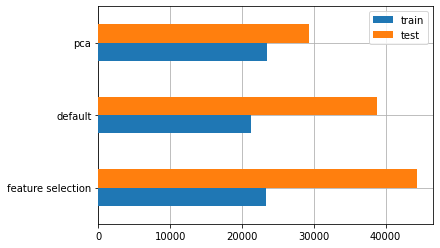

time: 357 ms (started: 2022-02-17 06:08:35 +00:00)


In [97]:
fig, ax = plt.subplots()
knn_mse_method.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [98]:
knn_r2_method = pd.DataFrame(columns=['train', 'test'], index=['default','feature selection','pca'])

knn_r2_method.loc['default', 'train'] = r2_score(y_true=y_train1, y_pred=knn1.predict(x_train1))
knn_r2_method.loc['default', 'test'] = r2_score(y_true=y_test1, y_pred=knn1.predict(x_test1))
knn_r2_method.loc['feature selection', 'train'] = r2_score(y_true=y_train1_fs, y_pred=knn2.predict(x_train1_fs))
knn_r2_method.loc['feature selection', 'test'] = r2_score(y_true=y_test1_fs, y_pred=knn2.predict(x_test1_fs))
knn_r2_method.loc['pca', 'train'] = r2_score(y_true=y_train1_pca, y_pred=knn3.predict(x_train1_pca))
knn_r2_method.loc['pca', 'test'] = r2_score(y_true=y_test1_pca, y_pred=knn3.predict(x_test1_pca))

knn_r2_method

train      test
default            0.486012 -0.650401
feature selection  0.384321 -1.194801
pca                0.373381  0.041765

time: 917 ms (started: 2022-02-17 06:08:36 +00:00)


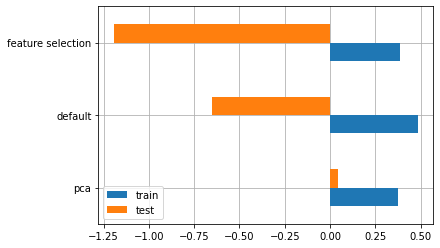

time: 363 ms (started: 2022-02-17 06:08:37 +00:00)


In [99]:
fig, ax = plt.subplots()
knn_r2_method.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan hasil perbandingan di atas didapatkan bahwa tanpa pengurangan fitur, model didapatkan memiliki hasil yang lebih baik pada model KNN

### Model Development with Random Forest

We try the Random Forest model using the number of trees=250, 400, and 700

In [100]:
# Import library that we need
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# create prediction model 
RF1 = RandomForestRegressor(n_estimators=250, max_depth=16, random_state=55, n_jobs=-1)
RF2 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF3 = RandomForestRegressor(n_estimators=700, max_depth=16, random_state=55, n_jobs=-1)

time: 201 ms (started: 2022-02-17 06:08:37 +00:00)


Akan diimplementasikan dengan menggunakan trees=400, perbandingan proporsi train-test

In [101]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF1 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF1.fit(x_train1, y_train1)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

9.85492992401123
time: 9.86 s (started: 2022-02-17 06:08:37 +00:00)


In [102]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF2 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF2.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

11.657567977905273
time: 11.7 s (started: 2022-02-17 06:08:47 +00:00)


In [103]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF3 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF3.fit(x_train3, y_train3)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

11.751269102096558
time: 11.8 s (started: 2022-02-17 06:08:59 +00:00)


In [104]:
rf_mse_1 = pd.DataFrame(columns=['train', 'test'], index=['80:20','70:30','90:10'])

rf_mse_1.loc['80:20', 'train'] = np.sqrt(mean_squared_error(y_true=y_train1, y_pred=RF1.predict(x_train1)))
rf_mse_1.loc['80:20', 'test'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF1.predict(x_test1)))
rf_mse_1.loc['70:30', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=RF2.predict(x_train2)))
rf_mse_1.loc['70:30', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=RF2.predict(x_test2)))
rf_mse_1.loc['90:10', 'train'] = np.sqrt(mean_squared_error(y_true=y_train3, y_pred=RF3.predict(x_train3)))
rf_mse_1.loc['90:10', 'test'] = np.sqrt(mean_squared_error(y_true=y_test3, y_pred=RF3.predict(x_test3)))

rf_mse_1

train          test
80:20  4388.163986  34284.741985
70:30  3994.685646   35033.68977
90:10  3793.364723  34359.192422

time: 2.8 s (started: 2022-02-17 06:09:11 +00:00)


Berdasarkan hasil diatas, pada model RF paling bagus dimodelkan pada proporsi train-test 70:30

Berikut akan dianalisis perbandingan antara trees=250,400, dan 700 pada proporsi train-test 70:30

In [105]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF = RandomForestRegressor(n_estimators=250, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

5.517484188079834
time: 5.53 s (started: 2022-02-17 06:09:14 +00:00)


In [106]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF2 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF2.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

6.886312007904053
time: 6.89 s (started: 2022-02-17 06:09:19 +00:00)


In [107]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF3 = RandomForestRegressor(n_estimators=700, max_depth=16, random_state=55, n_jobs=-1)
RF3.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

12.005502939224243
time: 12 s (started: 2022-02-17 06:09:26 +00:00)


In [108]:
rf_mse_2 = pd.DataFrame(columns=['train', 'test'], index=['tree=250','tree=400','tree=700'])

rf_mse_2.loc['tree=250', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=RF.predict(x_train2)))
rf_mse_2.loc['tree=250', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=RF.predict(x_test2)))
rf_mse_2.loc['tree=400', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=RF2.predict(x_train2)))
rf_mse_2.loc['tree=400', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=RF2.predict(x_test2)))
rf_mse_2.loc['tree=700', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=RF3.predict(x_train2)))
rf_mse_2.loc['tree=700', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=RF3.predict(x_test2)))

rf_mse_2

train          test
tree=250     4019.127  35092.729044
tree=400  3994.685646   35033.68977
tree=700  3999.507259  34526.785835

time: 1.96 s (started: 2022-02-17 06:09:38 +00:00)


Berdasarkan hasil diatas, didapatkan bahwa trees=400 merupakan model yang memiliki hasil terbaik

Berikut akan dianalisis perbandingan antara dataframe default, hasil feature selection, dan pca

In [109]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

6.8971898555755615
time: 6.9 s (started: 2022-02-17 06:09:40 +00:00)


In [110]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF2 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF2.fit(x_train2_fs, y_train2_fs)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

2.271994113922119
time: 2.28 s (started: 2022-02-17 06:09:47 +00:00)


In [111]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF3 = RandomForestRegressor(n_estimators=700, max_depth=16, random_state=55, n_jobs=-1)
RF3.fit(x_train2_pca, y_train2_pca)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration = t1-t0
              
print(duration)

3.612949848175049
time: 3.62 s (started: 2022-02-17 06:09:49 +00:00)


In [112]:
rf_mse_3 = pd.DataFrame(columns=['train', 'test'], index=['default','feature selection','pca'])

rf_mse_3.loc['default', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2, y_pred=RF.predict(x_train2)))
rf_mse_3.loc['default', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=RF.predict(x_test2)))
rf_mse_3.loc['feature selection', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2_fs, y_pred=RF2.predict(x_train2_fs)))
rf_mse_3.loc['feature selection', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2_fs, y_pred=RF2.predict(x_test2_fs)))
rf_mse_3.loc['pca', 'train'] = np.sqrt(mean_squared_error(y_true=y_train2_pca, y_pred=RF3.predict(x_train2_pca)))
rf_mse_3.loc['pca', 'test'] = np.sqrt(mean_squared_error(y_true=y_test2_pca, y_pred=RF3.predict(x_test2_pca)))

rf_mse_3

train          test
default             3994.685646   35033.68977
feature selection  17280.146639   36199.55677
pca                17596.141936  31068.815401

time: 2.16 s (started: 2022-02-17 06:09:53 +00:00)


Berdasarkan hasil diatas, kita memiliki kesimpulan yang sama yakni dataframe default memberikan hasil yang terbaik seperti pada model KNN

### Model Development with AdaBoost Regressor

We try the AdaBoost Regressor model using number of trees=250, 400, and 700

In [113]:
from sklearn.ensemble import AdaBoostRegressor
 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost2 = AdaBoostRegressor(n_estimators=100)
AdaBoost2.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_adaboost = t1-t0
              
print(duration)

3.612949848175049
time: 269 ms (started: 2022-02-17 06:09:55 +00:00)


In [114]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost3 = AdaBoostRegressor(n_estimators=250)
AdaBoost3.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_adaboost2 = t1-t0

time: 813 ms (started: 2022-02-17 06:09:55 +00:00)


In [115]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost4 = AdaBoostRegressor(n_estimators=400)
AdaBoost4.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_adaboost3 = t1-t0

time: 268 ms (started: 2022-02-17 06:09:56 +00:00)


In [116]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost5 = AdaBoostRegressor(n_estimators=700)
AdaBoost5.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_adaboost4 = t1-t0

time: 164 ms (started: 2022-02-17 06:09:56 +00:00)


## Model Development with Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train2,y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_lin_reg= t1-t0

time: 15.7 ms (started: 2022-02-17 06:09:57 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


## Model Development with Ridge Regression

In [118]:
from sklearn.linear_model import Ridge
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr2 = Ridge(alpha=1.5)
rr2.fit(x_train2,y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_rr_3 = t1-t0

time: 18 ms (started: 2022-02-17 06:09:57 +00:00)


In [119]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr3 = Ridge(alpha=5.5)
rr3.fit(x_train2,y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_rr_2 = t1-t0

time: 18.7 ms (started: 2022-02-17 06:09:57 +00:00)


In [120]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr4 = Ridge(alpha=0.1)
rr4.fit(x_train2,y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_rr_1 = t1-t0

time: 24 ms (started: 2022-02-17 06:09:57 +00:00)


## Model Development with Support Vector Regression

In [121]:
from sklearn.svm import LinearSVR
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
svm1 = LinearSVR(epsilon=0.01, C=10000)
svm1.fit(x_train2,y_train2) 
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_svr_3 = t1-t0 

time: 482 ms (started: 2022-02-17 06:09:57 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [122]:
from sklearn.svm import LinearSVR
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
svm2 = LinearSVR(epsilon=0.01, C=1000)
svm2.fit(x_train2,y_train2) 
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_svr_2 = t1-t0 

time: 439 ms (started: 2022-02-17 06:09:57 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [123]:
from sklearn.svm import LinearSVR
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
svm3 = LinearSVR(epsilon=0.001, C=10000)
svm3.fit(x_train2,y_train2) 
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_svr_1 = t1-t0 

time: 439 ms (started: 2022-02-17 06:09:58 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Model Development with Gradient Boost

In [124]:
from sklearn.ensemble import GradientBoostingRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting = GradientBoostingRegressor(n_estimators=100, random_state=55)
gboosting.fit(x_train2,y_train2)  
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_gboost = t1-t0

time: 846 ms (started: 2022-02-17 06:09:58 +00:00)


In [125]:
from sklearn.ensemble import GradientBoostingRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting2 = GradientBoostingRegressor(n_estimators=250, random_state=55)
gboosting2.fit(x_train2,y_train2)  
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_gboost2 = t1-t0

time: 2.08 s (started: 2022-02-17 06:09:59 +00:00)


In [126]:
from sklearn.ensemble import GradientBoostingRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting3 = GradientBoostingRegressor(n_estimators=400, random_state=55)
gboosting3.fit(x_train2,y_train2)  
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_gboost3 = t1-t0

time: 3.31 s (started: 2022-02-17 06:10:01 +00:00)


In [127]:
from sklearn.ensemble import GradientBoostingRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting4 = GradientBoostingRegressor(n_estimators=700, random_state=55)
gboosting4.fit(x_train2,y_train2)  
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_gboost4 = t1-t0

time: 5.78 s (started: 2022-02-17 06:10:04 +00:00)


## Conclusion

Dengan menggunakan proporsi Train-Test 70:30 didapatkan

In [128]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_knn_k5 = t1-t0

time: 17.3 ms (started: 2022-02-17 06:10:10 +00:00)


In [129]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=13)
knn2.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_knn_k13 = t1-t0

time: 17.6 ms (started: 2022-02-17 06:10:10 +00:00)


In [130]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn3 = KNeighborsRegressor(n_neighbors=17)
knn3.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_knn_k17 = t1-t0

time: 19.5 ms (started: 2022-02-17 06:10:10 +00:00)


In [131]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF1 = RandomForestRegressor(n_estimators=250, max_depth=16, random_state=55, n_jobs=-1)
RF1.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n250 = t1-t0

time: 4.42 s (started: 2022-02-17 06:10:10 +00:00)


In [132]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF2 = RandomForestRegressor(n_estimators=400, max_depth=16, random_state=55, n_jobs=-1)
RF2.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n400 = t1-t0

time: 6.88 s (started: 2022-02-17 06:10:15 +00:00)


In [133]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF3 = RandomForestRegressor(n_estimators=700, max_depth=16, random_state=55, n_jobs=-1)
RF3.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n700 = t1-t0

time: 11.9 s (started: 2022-02-17 06:10:22 +00:00)


In [134]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF4 = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF4.fit(x_train2, y_train2)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n100 = t1-t0

time: 1.78 s (started: 2022-02-17 06:10:34 +00:00)


In [135]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF5 = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF5.fit(x_train1_fs, y_train1_fs)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n100_fs = t1-t0

time: 560 ms (started: 2022-02-17 06:10:35 +00:00)


In [136]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF6 = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF6.fit(x_train1_pca, y_train1_pca)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n100_pca = t1-t0

time: 463 ms (started: 2022-02-17 06:10:36 +00:00)


In [137]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF7 = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF7.fit(x_train1, y_train1)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n100_80 = t1-t0

time: 1.65 s (started: 2022-02-17 06:10:36 +00:00)


In [138]:
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
RF8 = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF8.fit(x_train3, y_train3)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
duration_RF_n100_90 = t1-t0

time: 1.96 s (started: 2022-02-17 06:10:38 +00:00)


In [139]:
scaler.fit(x_test1[numerical_features1])
x_test1[numerical_features1] = scaler.transform(x_test1.loc[:, numerical_features1])
x_test1[numerical_features1].describe().round(4)

Longitude   Latitude      Speed  ...       RSRQ        SNR  UL_bitrate
count  2060.0000  2060.0000  2060.0000  ...  2060.0000  2060.0000   2060.0000
mean      0.0000     0.0000     0.0000  ...    -0.0000     0.0000      0.0000
std       1.0002     1.0002     1.0002  ...     1.0002     1.0002      1.0002
min      -1.4014    -1.4849    -1.2511  ...    -1.6647    -2.3303     -1.0680
25%      -0.7807    -1.0162    -1.2511  ...    -0.6581    -0.6949     -0.9343
50%      -0.2337     0.0625     0.0761  ...     0.0130     0.1509     -0.5023
75%       0.9599     1.0268     0.9457  ...     0.6841     0.7149      1.2401
max       1.7800     1.3519     1.8152  ...     2.6974     2.4630      1.5181

[8 rows x 8 columns]

time: 55.3 ms (started: 2022-02-17 06:10:40 +00:00)


In [140]:
scaler.fit(x_test1_fs[numerical_features2])
x_test1_fs[numerical_features2] = scaler.transform(x_test1_fs.loc[:, numerical_features2])
x_test1_fs[numerical_features2].describe().round(4)

LTERSSI       RSRP        SNR
count  2060.0000  2060.0000  2060.0000
mean      0.0000    -0.0000     0.0000
std       1.0002     1.0002     1.0002
min      -2.9042    -2.1998    -2.2904
25%      -0.6987    -0.7721    -0.6721
50%       0.1835     0.0310     0.1091
75%       1.0657     0.7449     0.7020
max       1.0657     2.5296     2.4528

time: 32.8 ms (started: 2022-02-17 06:10:40 +00:00)


In [141]:
scaler.fit(x_test1_pca[numerical_features3])
x_test1_pca[numerical_features3] = scaler.transform(x_test1_pca.loc[:, numerical_features3])
x_test1_pca[numerical_features3].describe().round(4)

performance
count    2060.0000
mean        0.0000
std         1.0002
min        -2.0845
25%        -0.8016
50%        -0.0009
75%         0.7541
max         2.1563

time: 29.3 ms (started: 2022-02-17 06:10:40 +00:00)


# Model Evaluation

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,150,250,400,700,1000]
}
gs_ab = GridSearchCV(GradientBoostingRegressor(),param_grid=param_grid)
gs_ab.fit(x_train1, y_train1)
test_pred = gs_ab.predict(x_test1)

time: 1min 26s (started: 2022-02-17 06:10:40 +00:00)


In [143]:
r3 = r2_score(y_true=y_test1, y_pred=test_pred).round(3)
r3

0.601

time: 9.08 ms (started: 2022-02-17 06:12:06 +00:00)


In [144]:
model_eval = pd.DataFrame(columns=['RMSE', 'R2 Score','Duration'], 
                     index=['KNN k=5','KNN k=13','KNN k=17',
                            'Random Forest trees=250','Random Forest trees=400','Random Forest trees=700','Random Forest trees=100',
                            'AdaBoost trees=100','Gradient Boost trees=100',
                            'Linear Regression','Ridge Regression alpha=0.1','Ridge Regression alpha=1.5','Ridge Regression alpha=5.5',
                            'SVR epsilon=0.001, C=10000','SVR epsilon=0.01, C=1000','SVR epsilon=0.01, C=10000'])

scaler.fit(x_test2[numerical_features1])
x_test2[numerical_features1] = scaler.transform(x_test2.loc[:, numerical_features1])

model_eval.loc['KNN k=5', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn1.predict(x_test1)))
model_eval.loc['KNN k=13', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn2.predict(x_test1)))
model_eval.loc['KNN k=17', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn3.predict(x_test1)))
model_eval.loc['Random Forest trees=250', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF1.predict(x_test1)))
model_eval.loc['Random Forest trees=400', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF2.predict(x_test1)))
model_eval.loc['Random Forest trees=700', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF3.predict(x_test1)))
model_eval.loc['Random Forest trees=100', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF4.predict(x_test1)))
model_eval.loc['AdaBoost trees=100', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=AdaBoost2.predict(x_test1)))
model_eval.loc['Gradient Boost trees=100', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=gboosting.predict(x_test1)))
model_eval.loc['Linear Regression', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=lin_reg.predict(x_test1)))
model_eval.loc['Ridge Regression alpha=0.1', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=rr4.predict(x_test1)))
model_eval.loc['Ridge Regression alpha=1.5', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=rr2.predict(x_test1)))
model_eval.loc['Ridge Regression alpha=5.5', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=rr3.predict(x_test1)))
model_eval.loc['SVR epsilon=0.001, C=10000', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=svm3.predict(x_test1)))
model_eval.loc['SVR epsilon=0.01, C=1000', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=svm2.predict(x_test1)))
model_eval.loc['SVR epsilon=0.01, C=10000', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=svm1.predict(x_test1)))

model_eval.loc['KNN k=5', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=knn1.predict(x_test1)).round(3)
model_eval.loc['KNN k=13', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=knn2.predict(x_test1)).round(3)
model_eval.loc['KNN k=17', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=knn3.predict(x_test1)).round(3)
model_eval.loc['Random Forest trees=250', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF1.predict(x_test1)).round(3)
model_eval.loc['Random Forest trees=400', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF2.predict(x_test1)).round(3)
model_eval.loc['Random Forest trees=700', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF3.predict(x_test1)).round(3)
model_eval.loc['Random Forest trees=100', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF4.predict(x_test1)).round(3)
model_eval.loc['AdaBoost trees=100', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=AdaBoost2.predict(x_test1)).round(3)
model_eval.loc['Gradient Boost trees=100', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=gboosting.predict(x_test1)).round(3)
model_eval.loc['Linear Regression', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=lin_reg.predict(x_test1)).round(3)
model_eval.loc['Ridge Regression alpha=0.1', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=rr4.predict(x_test1)).round(3)
model_eval.loc['Ridge Regression alpha=1.5', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=rr2.predict(x_test1)).round(3)
model_eval.loc['Ridge Regression alpha=5.5', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=rr3.predict(x_test1)).round(3)
model_eval.loc['SVR epsilon=0.001, C=10000', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=svm3.predict(x_test1)).round(3)
model_eval.loc['SVR epsilon=0.01, C=1000', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=svm2.predict(x_test1)).round(3)
model_eval.loc['SVR epsilon=0.01, C=10000', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=svm1.predict(x_test1)).round(3)

model_eval.loc['KNN k=5', 'Duration'] = duration_knn_k5*1000
model_eval.loc['KNN k=13', 'Duration'] = duration_knn_k13*1000
model_eval.loc['KNN k=17', 'Duration'] = duration_knn_k17*1000
model_eval.loc['Random Forest trees=250', 'Duration'] = duration_RF_n250*1000
model_eval.loc['Random Forest trees=400', 'Duration'] = duration_RF_n400*1000
model_eval.loc['Random Forest trees=700', 'Duration'] = duration_RF_n700*1000
model_eval.loc['Random Forest trees=100', 'Duration'] = duration_RF_n100*1000
model_eval.loc['AdaBoost trees=100', 'Duration'] = duration_adaboost*1000
model_eval.loc['Gradient Boost trees=100', 'Duration'] = duration_gboost*1000
model_eval.loc['Linear Regression', 'Duration'] = duration_lin_reg*1000
model_eval.loc['Ridge Regression alpha=0.1', 'Duration'] = duration_rr_1*1000
model_eval.loc['Ridge Regression alpha=1.5', 'Duration'] = duration_rr_3*1000
model_eval.loc['Ridge Regression alpha=5.5', 'Duration'] = duration_rr_2*1000
model_eval.loc['SVR epsilon=0.001, C=10000', 'Duration'] = duration_svr_1*1000
model_eval.loc['SVR epsilon=0.01, C=1000', 'Duration'] = duration_svr_2*1000
model_eval.loc['SVR epsilon=0.01, C=10000', 'Duration'] = duration_svr_3*1000

model_eval

RMSE R2 Score      Duration
KNN k=5                     16847.386291     0.69     11.791945
KNN k=13                     20252.85787    0.552     14.488935
KNN k=17                      20892.2309    0.523     15.142918
Random Forest trees=250      13359.95032    0.805   4413.766861
Random Forest trees=400     13316.531787    0.806   6879.625797
Random Forest trees=700     13281.514751    0.807  11936.807156
Random Forest trees=100     13265.226666    0.808   1776.154041
AdaBoost trees=100          23286.279191    0.408    264.023066
Gradient Boost trees=100     18308.44349    0.634    842.970848
Linear Regression            24633.56888    0.337      10.78701
Ridge Regression alpha=0.1  24633.572391    0.337      8.519888
Ridge Regression alpha=1.5  24633.622197    0.337     13.360977
Ridge Regression alpha=5.5  24633.771069    0.337     15.189886
SVR epsilon=0.001, C=10000   30289.30239   -0.002    434.070826
SVR epsilon=0.01, C=1000    31185.623261   -0.063    434.449911
SVR epsilon=0.01, C=10000   33349.516958   -0.215    472.676992

time: 3.06 s (started: 2022-02-17 06:12:06 +00:00)


In [145]:
model_eval1 = pd.DataFrame(columns=['RMSE', 'R2 Score','Duration'], 
                     index=['KNN k=5','KNN k=13','KNN k=17',
                            'Random Forest trees=250','Random Forest trees=400','Random Forest trees=700','Random Forest trees=100',
                            'AdaBoost trees=100','AdaBoost trees=250','AdaBoost trees=400','AdaBoost trees=700',
                            'Gradient Boost trees=100','Gradient Boost trees=250','Gradient Boost trees=400','Gradient Boost trees=700',
                            'Linear Regression','Ridge Regression alpha=0.1','Ridge Regression alpha=1.5','Ridge Regression alpha=5.5',
                            'SVR epsilon=0.001, C=10000','SVR epsilon=0.01, C=1000','SVR epsilon=0.01, C=10000'])

scaler.fit(x_test2[numerical_features1])
x_test2[numerical_features1] = scaler.transform(x_test2.loc[:, numerical_features1])

model_eval1.loc['KNN k=5', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn1.predict(x_test1)))
model_eval1.loc['KNN k=13', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn2.predict(x_test1)))
model_eval1.loc['KNN k=17', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=knn3.predict(x_test1)))
model_eval1.loc['Random Forest trees=250', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF1.predict(x_test1)))
model_eval1.loc['Random Forest trees=400', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF2.predict(x_test1)))
model_eval1.loc['Random Forest trees=700', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF3.predict(x_test1)))
model_eval1.loc['Random Forest trees=100', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF4.predict(x_test1)))
model_eval1.loc['AdaBoost trees=100', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=AdaBoost2.predict(x_test1)))
model_eval1.loc['AdaBoost trees=250', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=AdaBoost3.predict(x_test1)))
model_eval1.loc['AdaBoost trees=400', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=AdaBoost4.predict(x_test1)))
model_eval1.loc['AdaBoost trees=700', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=AdaBoost5.predict(x_test1)))
model_eval1.loc['Gradient Boost trees=100', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=gboosting.predict(x_test1)))
model_eval1.loc['Gradient Boost trees=250', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=gboosting2.predict(x_test1)))
model_eval1.loc['Gradient Boost trees=400', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=gboosting3.predict(x_test1)))
model_eval1.loc['Gradient Boost trees=700', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=gboosting4.predict(x_test1)))
model_eval1.loc['Linear Regression', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=lin_reg.predict(x_test1)))
model_eval1.loc['Ridge Regression alpha=0.1', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=rr4.predict(x_test1)))
model_eval1.loc['Ridge Regression alpha=1.5', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=rr2.predict(x_test1)))
model_eval1.loc['Ridge Regression alpha=5.5', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=rr3.predict(x_test1)))
model_eval1.loc['SVR epsilon=0.001, C=10000', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=svm3.predict(x_test1)))
model_eval1.loc['SVR epsilon=0.01, C=1000', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=svm2.predict(x_test1)))
model_eval1.loc['SVR epsilon=0.01, C=10000', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=svm1.predict(x_test1)))

model_eval1.loc['KNN k=5', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=knn1.predict(x_test1)).round(3)
model_eval1.loc['KNN k=13', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=knn2.predict(x_test1)).round(3)
model_eval1.loc['KNN k=17', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=knn3.predict(x_test1)).round(3)
model_eval1.loc['Random Forest trees=250', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF1.predict(x_test1)).round(3)
model_eval1.loc['Random Forest trees=400', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF2.predict(x_test1)).round(3)
model_eval1.loc['Random Forest trees=700', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF3.predict(x_test1)).round(3)
model_eval1.loc['Random Forest trees=100', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF4.predict(x_test1)).round(3)
model_eval1.loc['AdaBoost trees=100', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=AdaBoost2.predict(x_test1)).round(3)
model_eval1.loc['AdaBoost trees=250', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=AdaBoost3.predict(x_test1)).round(3)
model_eval1.loc['AdaBoost trees=400', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=AdaBoost4.predict(x_test1)).round(3)
model_eval1.loc['AdaBoost trees=700', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=AdaBoost5.predict(x_test1)).round(3)
model_eval1.loc['Gradient Boost trees=100', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=gboosting.predict(x_test1)).round(3)
model_eval1.loc['Gradient Boost trees=250', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=gboosting2.predict(x_test1)).round(3)
model_eval1.loc['Gradient Boost trees=400', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=gboosting3.predict(x_test1)).round(3)
model_eval1.loc['Gradient Boost trees=700', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=gboosting4.predict(x_test1)).round(3)
model_eval1.loc['Linear Regression', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=lin_reg.predict(x_test1)).round(3)
model_eval1.loc['Ridge Regression alpha=0.1', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=rr4.predict(x_test1)).round(3)
model_eval1.loc['Ridge Regression alpha=1.5', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=rr2.predict(x_test1)).round(3)
model_eval1.loc['Ridge Regression alpha=5.5', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=rr3.predict(x_test1)).round(3)
model_eval1.loc['SVR epsilon=0.001, C=10000', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=svm3.predict(x_test1)).round(3)
model_eval1.loc['SVR epsilon=0.01, C=1000', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=svm2.predict(x_test1)).round(3)
model_eval1.loc['SVR epsilon=0.01, C=10000', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=svm1.predict(x_test1)).round(3)

model_eval1.loc['KNN k=5', 'Duration'] = duration_knn_k5*1000
model_eval1.loc['KNN k=13', 'Duration'] = duration_knn_k13*1000
model_eval1.loc['KNN k=17', 'Duration'] = duration_knn_k17*1000
model_eval1.loc['Random Forest trees=250', 'Duration'] = duration_RF_n250*1000
model_eval1.loc['Random Forest trees=400', 'Duration'] = duration_RF_n400*1000
model_eval1.loc['Random Forest trees=700', 'Duration'] = duration_RF_n700*1000
model_eval1.loc['Random Forest trees=100', 'Duration'] = duration_RF_n100*1000
model_eval1.loc['AdaBoost trees=100', 'Duration'] = duration_adaboost*1000
model_eval1.loc['AdaBoost trees=250', 'Duration'] = duration_adaboost2*1000
model_eval1.loc['AdaBoost trees=400', 'Duration'] = duration_adaboost3*1000
model_eval1.loc['AdaBoost trees=700', 'Duration'] = duration_adaboost4*1000
model_eval1.loc['Gradient Boost trees=100', 'Duration'] = duration_gboost*1000
model_eval1.loc['Gradient Boost trees=250', 'Duration'] = duration_gboost2*1000
model_eval1.loc['Gradient Boost trees=400', 'Duration'] = duration_gboost3*1000
model_eval1.loc['Gradient Boost trees=700', 'Duration'] = duration_gboost4*1000
model_eval1.loc['Linear Regression', 'Duration'] = duration_lin_reg*1000
model_eval1.loc['Ridge Regression alpha=0.1', 'Duration'] = duration_rr_1*1000
model_eval1.loc['Ridge Regression alpha=1.5', 'Duration'] = duration_rr_3*1000
model_eval1.loc['Ridge Regression alpha=5.5', 'Duration'] = duration_rr_2*1000
model_eval1.loc['SVR epsilon=0.001, C=10000', 'Duration'] = duration_svr_1*1000
model_eval1.loc['SVR epsilon=0.01, C=1000', 'Duration'] = duration_svr_2*1000
model_eval1.loc['SVR epsilon=0.01, C=10000', 'Duration'] = duration_svr_3*1000

model_eval1

RMSE R2 Score      Duration
KNN k=5                     16847.386291     0.69     11.791945
KNN k=13                     20252.85787    0.552     14.488935
KNN k=17                      20892.2309    0.523     15.142918
Random Forest trees=250      13359.95032    0.805   4413.766861
Random Forest trees=400     13316.531787    0.806   6879.625797
Random Forest trees=700     13281.514751    0.807  11936.807156
Random Forest trees=100     13265.226666    0.808   1776.154041
AdaBoost trees=100          23286.279191    0.408    264.023066
AdaBoost trees=250          22983.854373    0.423    808.902025
AdaBoost trees=400          23722.925854    0.385    264.822006
AdaBoost trees=700          22743.342329    0.435    158.869028
Gradient Boost trees=100     18308.44349    0.634    842.970848
Gradient Boost trees=250     17359.13434    0.671   2076.718807
Gradient Boost trees=400    16754.525417    0.693     3299.2239
Gradient Boost trees=700    16274.340479    0.711   5771.437883
Linear Regression            24633.56888    0.337      10.78701
Ridge Regression alpha=0.1  24633.572391    0.337      8.519888
Ridge Regression alpha=1.5  24633.622197    0.337     13.360977
Ridge Regression alpha=5.5  24633.771069    0.337     15.189886
SVR epsilon=0.001, C=10000   30289.30239   -0.002    434.070826
SVR epsilon=0.01, C=1000    31185.623261   -0.063    434.449911
SVR epsilon=0.01, C=10000   33349.516958   -0.215    472.676992

time: 3.26 s (started: 2022-02-17 06:12:10 +00:00)


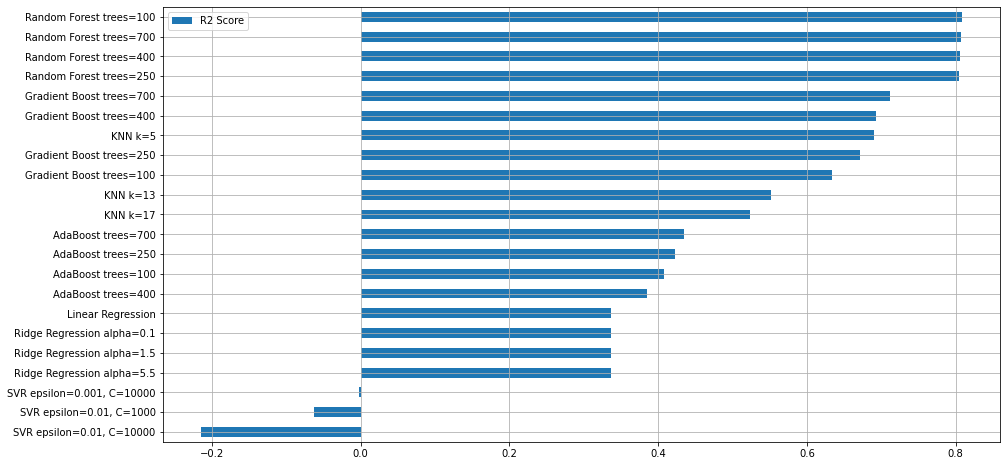

time: 409 ms (started: 2022-02-17 06:12:13 +00:00)


In [146]:
fig, ax = plt.subplots()
model_eval1[['R2 Score']].sort_values(by='R2 Score', ascending=True).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()


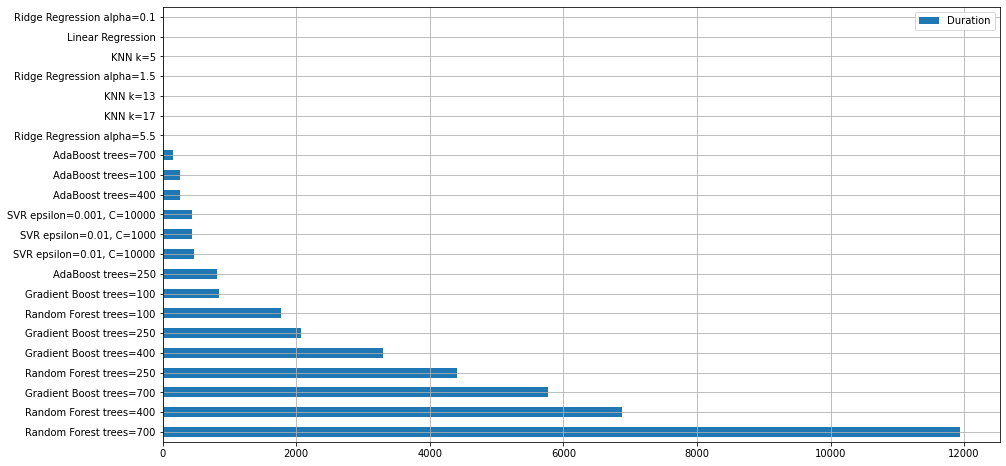

time: 413 ms (started: 2022-02-17 06:12:13 +00:00)


In [147]:
fig, ax = plt.subplots()
model_eval1[['Duration']].sort_values(by='Duration', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

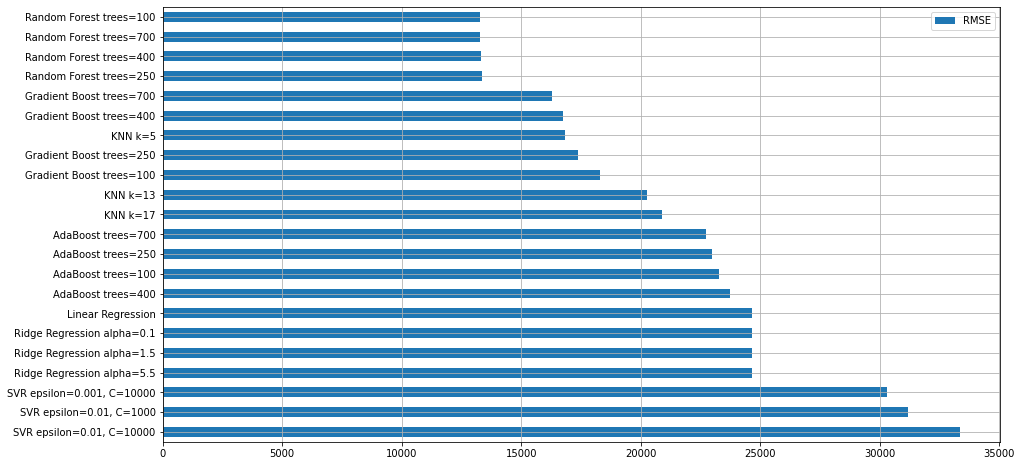

time: 423 ms (started: 2022-02-17 06:12:14 +00:00)


In [148]:
fig, ax = plt.subplots()
model_eval1[['RMSE']].sort_values(by='RMSE', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

In [149]:
model_eval_method = pd.DataFrame(columns=['RMSE', 'R2 Score','Duration'], 
                     index=['Default','Feature Selection','PCA'])
model_eval_method.loc['Default', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF4.predict(x_test1)))
model_eval_method.loc['Feature Selection', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1_fs, y_pred=RF5.predict(x_test1_fs)))
model_eval_method.loc['PCA', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1_pca, y_pred=RF6.predict(x_test1_pca)))

model_eval_method.loc['Default', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF4.predict(x_test1)).round(3)
model_eval_method.loc['Feature Selection', 'R2 Score'] = r2_score(y_true=y_test1_fs, y_pred=RF5.predict(x_test1_fs)).round(3)
model_eval_method.loc['PCA', 'R2 Score'] = r2_score(y_true=y_test1_pca, y_pred=RF6.predict(x_test1_pca)).round(3)

model_eval_method.loc['Default', 'Duration'] = duration_RF_n100*1000
model_eval_method.loc['Feature Selection', 'Duration'] = duration_RF_n100_fs*1000
model_eval_method.loc['PCA', 'Duration'] = duration_RF_n100_pca*1000

model_eval_method

RMSE R2 Score     Duration
Default            13265.226666    0.808  1776.154041
Feature Selection  22304.844934    0.447   557.157993
PCA                 29456.49388    0.031   459.584951

time: 671 ms (started: 2022-02-17 06:12:14 +00:00)


In [150]:
model_eval_prop = pd.DataFrame(columns=['RMSE', 'R2 Score','Duration'], 
                     index=['90:10','80:20','70:30'])
model_eval_prop.loc['90:10', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test3, y_pred=RF8.predict(x_test3)))
model_eval_prop.loc['80:20', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=RF4.predict(x_test1)))
model_eval_prop.loc['70:30', 'RMSE'] = np.sqrt(mean_squared_error(y_true=y_test2, y_pred=RF4.predict(x_test2)))

model_eval_prop.loc['90:10', 'R2 Score'] = r2_score(y_true=y_test3, y_pred=RF8.predict(x_test3)).round(3)
model_eval_prop.loc['80:20', 'R2 Score'] = r2_score(y_true=y_test1, y_pred=RF4.predict(x_test1)).round(3)
model_eval_prop.loc['70:30', 'R2 Score'] = r2_score(y_true=y_test2, y_pred=RF4.predict(x_test2)).round(3)

model_eval_prop.loc['90:10', 'Duration'] = duration_RF_n100_90*1000
model_eval_prop.loc['80:20', 'Duration'] = duration_RF_n100_80*1000
model_eval_prop.loc['70:30', 'Duration'] = duration_RF_n100*1000

model_eval_prop

RMSE R2 Score     Duration
90:10   33475.27629   -0.259  1954.220057
80:20  13265.226666    0.808  1648.001909
70:30  13835.952828    0.795  1776.154041

time: 662 ms (started: 2022-02-17 06:12:15 +00:00)


### Testing with test Data

To test it, let's make a prediction using some values from the test data.

In [ ]:
test_data = pd.DataFrame(columns=['actual', 'RF trees=100','KNN k=5','Gradient Boost trees=700','AdaBoost trees=250'])
test_data['actual']=y_test1
test_data['RF trees=100']=RF4.predict(x_test1.copy().round(1))
test_data['KNN k=5']=knn1.predict(x_test1.copy().round(1))
test_data['Gradient Boost trees=700']=gboosting4.predict(x_test1.copy().round(1))
test_data['AdaBoost trees=250']=AdaBoost3.predict(x_test1.copy().round(1))
test_data

actual  ...  AdaBoost trees=250
Timestamp             ...                    
1.575537e+09    9619  ...        22768.641975
1.575538e+09       1  ...        33616.533230
1.575537e+09   20054  ...        22768.641975
1.575538e+09    5602  ...        22768.641975
1.575537e+09   98086  ...        50635.148323
...              ...  ...                 ...
1.575537e+09   13976  ...        26941.748874
1.575538e+09   28280  ...        28013.503472
1.575539e+09     272  ...        49077.921281
1.575537e+09   23700  ...        28692.231203
1.575538e+09      56  ...        12907.429268

[2060 rows x 5 columns]

time: 277 ms (started: 2022-02-16 16:29:20 +00:00)


# Data Visualization

### Random Forest Model Prediction with number of trees=100

In [ ]:
import plotly.express as px
df_pred = {'actual':test_data['actual'],'prediksi':test_data['RF trees=100']}
df_pred = pd.DataFrame(df_pred)
df_pred=df_pred.sort_values(by='Timestamp')
df_pred

actual      prediksi
Timestamp                         
1.575537e+09    7651  12271.950000
1.575537e+09      21  27982.293613
1.575537e+09    5363   9824.931595
1.575537e+09    8180  24983.861369
1.575537e+09    5363   9706.021595
...              ...           ...
1.575540e+09   36245  30444.200000
1.575540e+09   39510  31457.340813
1.575540e+09   39510  32374.961177
1.575540e+09      90   6978.968020
1.575540e+09      90   6978.968020

[2060 rows x 2 columns]

time: 866 ms (started: 2022-02-16 16:29:20 +00:00)


In [ ]:
#Visualisasi Data
fig = px.line(df_pred)
fig.show()

time: 1.23 s (started: 2022-02-16 16:29:21 +00:00)


### KNN Model Prediction with k=5

In [ ]:
import plotly.express as px
df_pred = {'actual':test_data['actual'],'prediksi':test_data['KNN k=5']}
df_pred = pd.DataFrame(df_pred)
df_pred=df_pred.sort_values(by='Timestamp')
df_pred

actual  prediksi
Timestamp                     
1.575537e+09    7651   37148.2
1.575537e+09      21   37148.2
1.575537e+09    5363    5363.0
1.575537e+09    8180    5363.0
1.575537e+09    5363    5363.0
...              ...       ...
1.575540e+09   36245   28650.8
1.575540e+09   39510   35872.0
1.575540e+09   39510   35872.0
1.575540e+09      90    4551.6
1.575540e+09      90    4551.6

[2060 rows x 2 columns]

time: 31.6 ms (started: 2022-02-16 16:29:22 +00:00)


In [ ]:
#Visualisasi Data
fig = px.line(df_pred)
fig.show()

time: 95.2 ms (started: 2022-02-16 16:29:22 +00:00)


### Gradient Boost Model Prediction with trees=700

In [ ]:
import plotly.express as px
df_pred = {'actual':test_data['actual'],'prediksi':test_data['Gradient Boost trees=700']}
df_pred = pd.DataFrame(df_pred)
df_pred=df_pred.sort_values(by='Timestamp')
df_pred

actual      prediksi
Timestamp                         
1.575537e+09    7651 -30571.986334
1.575537e+09      21 -17336.984788
1.575537e+09    5363 -35980.146442
1.575537e+09    8180 -14377.990043
1.575537e+09    5363 -41641.980972
...              ...           ...
1.575540e+09   36245  22764.696304
1.575540e+09   39510   5285.733073
1.575540e+09   39510   8754.116250
1.575540e+09      90 -16335.187795
1.575540e+09      90 -16335.187795

[2060 rows x 2 columns]

time: 34 ms (started: 2022-02-16 16:29:22 +00:00)


In [ ]:
#Visualisasi Data
fig = px.line(df_pred)
fig.show()

time: 92.9 ms (started: 2022-02-16 16:29:22 +00:00)


### AdaBoost Regressor Model Prediction with number of trees=250

In [ ]:
import plotly.express as px
df_pred = {'actual':test_data['actual'],'prediksi':test_data['AdaBoost trees=250']}
df_pred = pd.DataFrame(df_pred)
df_pred=df_pred.sort_values(by='Timestamp')
df_pred

actual      prediksi
Timestamp                         
1.575537e+09    7651  39844.063993
1.575537e+09      21  49307.010474
1.575537e+09    5363  32329.207264
1.575537e+09    8180  34472.758125
1.575537e+09    5363  32329.207264
...              ...           ...
1.575540e+09   36245  33616.533230
1.575540e+09   39510  42956.901163
1.575540e+09   39510  42956.901163
1.575540e+09      90  30285.757632
1.575540e+09      90  30285.757632

[2060 rows x 2 columns]

time: 32 ms (started: 2022-02-16 16:29:22 +00:00)


In [ ]:
#Visualisasi Data
fig = px.line(df_pred)
fig.show()

time: 105 ms (started: 2022-02-16 16:29:23 +00:00)


# Time Series Forecasting

## ARIMA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



time: 270 ms (started: 2022-02-16 16:30:57 +00:00)


                       DL_bitrate
Timestamp                        
2019-12-05 09:02:32           NaN
2019-12-05 09:02:32           NaN
2019-12-05 09:02:33           NaN
2019-12-05 09:02:33           NaN
2019-12-05 09:02:34           NaN
...                           ...
2019-12-05 09:53:26  18836.250000
2019-12-05 09:53:27  19433.583333
2019-12-05 09:53:27  20030.916667
2019-12-05 09:53:28  19743.666667
2019-12-05 09:53:28  19456.416667

[7292 rows x 1 columns]                        DL_bitrate
Timestamp                        
2019-12-05 09:02:32           NaN
2019-12-05 09:02:32           NaN
2019-12-05 09:02:33           NaN
2019-12-05 09:02:33           NaN
2019-12-05 09:02:34           NaN
...                           ...
2019-12-05 09:53:26  15241.003180
2019-12-05 09:53:27  15035.838210
2019-12-05 09:53:27  14802.703892
2019-12-05 09:53:28  15130.158192
2019-12-05 09:53:28  15445.100557

[7292 rows x 1 columns]


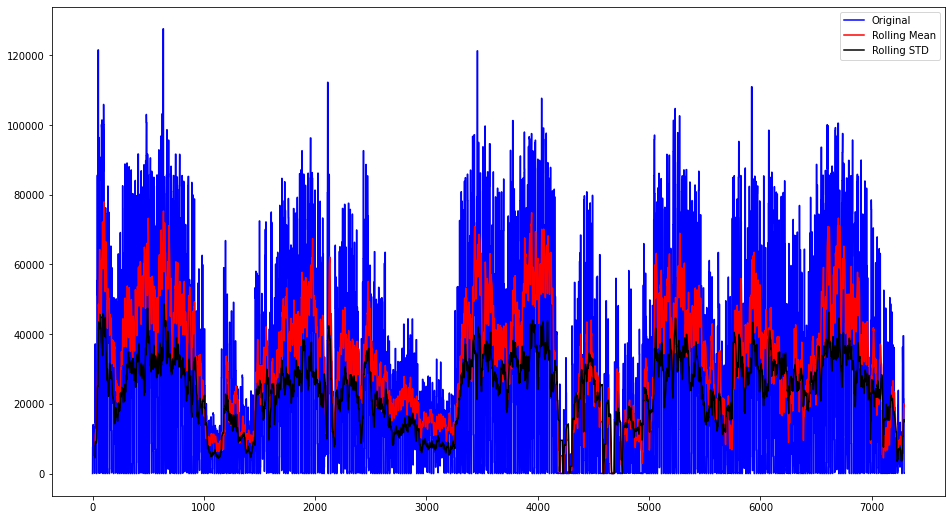

time: 1.43 s (started: 2022-02-16 16:32:05 +00:00)


In [ ]:
# C:\Users\18117\Downloads\Cellular-Traffic-Prediction-using-LSTM-master\LSTM\Datasets\Cell_000231
rcParams['figure.figsize']  = 16, 9
dataset = pd.read_csv('/content/drive/My Drive/Tugas Akhir - 4G LTE Network Performance Analysis/Dataset Kingston/S9/S9-9am-20191205.csv', encoding='utf-7')
dataset = dataset[['Timestamp','DL_bitrate']]
dataset.set_index('Timestamp', inplace=True)
rolmean = dataset.rolling(window=24).mean()
rolstd = dataset.rolling(window=24).std()
print(rolmean, rolstd)
orig = plt.plot(dataset.values, color = 'blue', label='Original')
mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
std = plt.plot(rolstd.values, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.show(block='False')

In [ ]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(dataset['DL_bitrate'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(traffic):
    result=adfuller(traffic)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


adfuller_test(dataset['DL_bitrate'])

ADF Test Statistic : -5.107743007739131
p-value : 1.3525021655621898e-05
#Lags Used : 36
Number of Observations Used : 7255
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
time: 1.9 s (started: 2022-02-16 16:32:36 +00:00)


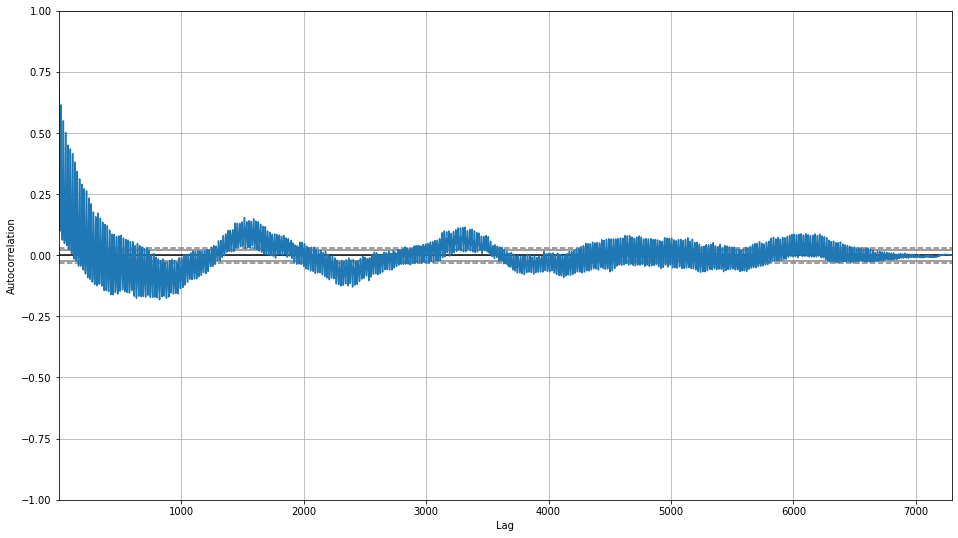

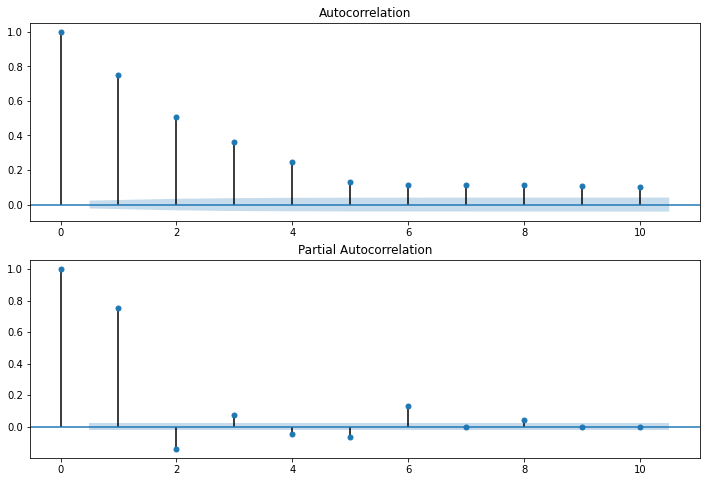

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



time: 9.15 s (started: 2022-02-16 16:32:55 +00:00)


In [ ]:
# Autocorrelation

from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 9))
autocorrelation_plot(dataset['DL_bitrate'])
plt.show()

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['DL_bitrate'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset['DL_bitrate'],lags=10,ax=ax2)
plt.show()

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(dataset['DL_bitrate'],order=(5,0,2))
results=model.fit(disp=-1)
final = results.fittedvalues

In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640540 sha256=4e93b701dd9f58d14809e75da4d623b49eb9d9cf48a2223098caca41d9001c70
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
time: 1min 47s (started: 2022-02-16 18:48:37 +00:00)


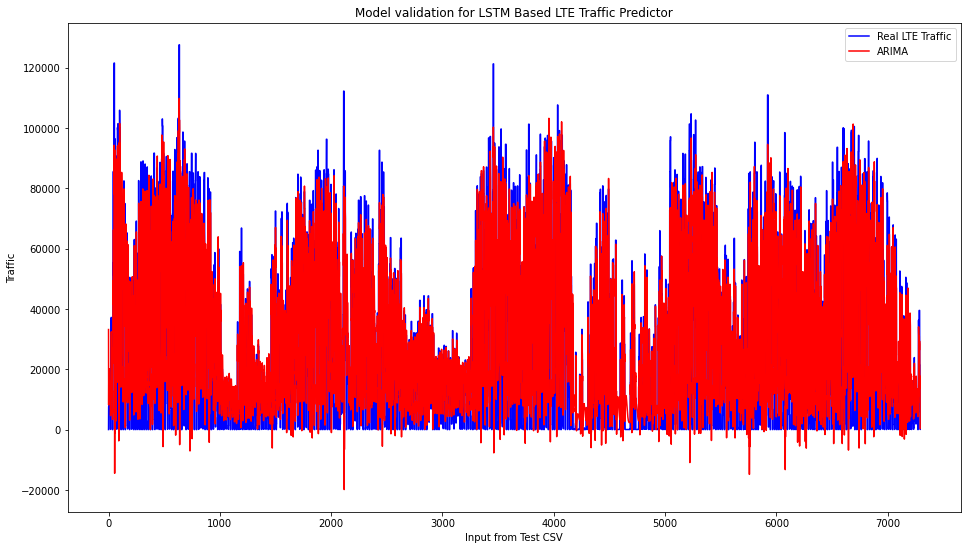

time: 1.41 s (started: 2022-02-16 17:32:00 +00:00)


In [ ]:
#Plot

# plt.plot(dataset["DL_bitrate"].values, color='blue', label='Real LTE Traffic')
# plt.plot(final.values, color='red', label='ARIMA')
# plt.title('Model validation for LSTM Based LTE Traffic Predictor')
# plt.xlabel('Input from Test CSV')
# plt.ylabel('Traffic')
# plt.legend()
# plt.show()
# plt.show()
fig, ax = plt.subplots()
ax.plot(dataset["DL_bitrate"].values, color='blue', label='Real LTE Traffic')
ax.plot(final.values, color='red', label='ARIMA')
ax.set_title('Model validation for LSTM Based LTE Traffic Predictor')
ax.set_xlabel('Input from Test CSV')
ax.set_ylabel('Traffic')
ax.legend()
# plt.show()
# plt.show()
# fig = px.line(df_pred)
fig.show()

In [ ]:
df_pred_arima = {'Actual':dataset["DL_bitrate"].values,'ARIMA':final.values}
df_pred_arima = pd.DataFrame(df_pred_arima)
# df_pred_arima = df_pred_arima.sort_values(by='Timestamp')
df_pred_arima

Actual         ARIMA
0         21  33178.997922
1       7651   8195.041047
2       7651  15900.084989
3      10017  13720.162589
4      10017  17234.153902
...      ...           ...
7287   21320  28372.724168
7288   21320  13610.024896
7289   21320  17742.387494
7290      90  16141.023117
7291      90    393.754523

[7292 rows x 2 columns]

time: 32.4 ms (started: 2022-02-16 17:38:43 +00:00)


In [ ]:
fig = px.line(df_pred_arima)
fig.show()

time: 249 ms (started: 2022-02-16 17:38:46 +00:00)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

r2 = r2_score(dataset["DL_bitrate"].values, results.fittedvalues)
mse = mean_squared_error(dataset["DL_bitrate"].values, results.fittedvalues)
print("ARIMA R2 Squared Error: ", r2)
print("ARIMA Mean Squared Error: ", math.sqrt(mse))

ARIMA R2 Squared Error:  0.6075837770247863
ARIMA Mean Squared Error:  18823.62945829782
time: 13.4 ms (started: 2022-02-16 16:36:07 +00:00)


## Recurrent Neural Network

In [ ]:
# Recurrent Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Importing the training set
dataset = pd.read_csv('/content/drive/My Drive/Tugas Akhir - 4G LTE Network Performance Analysis/Dataset Kingston/S9/S9-9am-20191205.csv', encoding='utf-7')
dataset = dataset[['Timestamp','DL_bitrate']]
training_data = dataset.drop(["Timestamp"], axis=1)

time: 533 ms (started: 2022-02-16 16:38:12 +00:00)


In [ ]:
# Feature Scaling

scaler = MinMaxScaler()
training_dataset = scaler.fit_transform(training_data)

# Creating a data structure with 24 timesteps and 1 output
X_train = []
y_train = []
for i in range(24, training_dataset.shape[0]):
    X_train.append(training_dataset[i - 24:i, 0])
    y_train.append(training_dataset[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

time: 32.4 ms (started: 2022-02-16 16:38:29 +00:00)


In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.2 MB/s 
time: 7.95 s (started: 2022-02-16 16:38:38 +00:00)


In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Initialising the RNN
regressior = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressior.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressior.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressior.add(LSTM(units=60, return_sequences=True))
regressior.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressior.add(LSTM(units=80, return_sequences=True))
regressior.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressior.add(LSTM(units=120))
regressior.add(Dropout(0.2))

# Adding the output layer
regressior.add(Dense(units=1))

# Compiling the RNN
regressior.compile(optimizer='nadam', loss='mean_squared_error')

# Fitting the RNN to the Training set
history = regressior.fit(X_train, y_train, epochs=120, batch_size=39)

Epoch 1/120
187/187 [==============================] - 43s 134ms/step - loss: 0.0428
Epoch 2/120
187/187 [==============================] - 27s 145ms/step - loss: 0.0351
Epoch 3/120
187/187 [==============================] - 27s 142ms/step - loss: 0.0329
Epoch 4/120
187/187 [==============================] - 17s 90ms/step - loss: 0.0318
Epoch 5/120
187/187 [==============================] - 16s 86ms/step - loss: 0.0304
Epoch 6/120
187/187 [==============================] - 16s 86ms/step - loss: 0.0302
Epoch 7/120
187/187 [==============================] - 16s 88ms/step - loss: 0.0295
Epoch 8/120
187/187 [==============================] - 18s 94ms/step - loss: 0.0296
Epoch 9/120
187/187 [==============================] - 16s 85ms/step - loss: 0.0283
Epoch 10/120
187/187 [==============================] - 17s 90ms/step - loss: 0.0266
Epoch 11/120
187/187 [==============================] - 16s 87ms/step - loss: 0.0240
Epoch 12/120
187/187 [==============================] - 17s 88ms/step -

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real traffic values of Cell_000112
dataset_test = pd.read_csv('/content/drive/My Drive/Tugas Akhir - 4G LTE Network Performance Analysis/Dataset Kingston/S9/S9-9am-20191205.csv', encoding='utf-7')
dataset_test = dataset_test[['Timestamp','DL_bitrate']]
date_only = dataset_test.drop(['DL_bitrate'], axis=1)
past_24_hours = dataset.tail(24)
df = past_24_hours.append(dataset_test, ignore_index=True)
df = df.drop(['Timestamp'], axis=1)

# Getting the predicted traffic values of Cell_000112
inputs = scaler.fit_transform(df)
X_test = []
y_test_scaled = []
for i in range(24, inputs.shape[0]):
    X_test.append(inputs[i - 24:i])
    y_test_scaled.append(inputs[i, 0])
X_test, y_test_scaled = np.array(X_test), np.array(y_test_scaled)
predicts_scaled = regressior.predict(X_test)
scale_value = scaler.scale_
scale = 1 / scale_value
predicts = predicts_scaled * scale
y_test = y_test_scaled * scale
y_test = np.reshape(y_test, (y_test.shape[0], 1))

time: 10.7 s (started: 2022-02-16 17:15:20 +00:00)


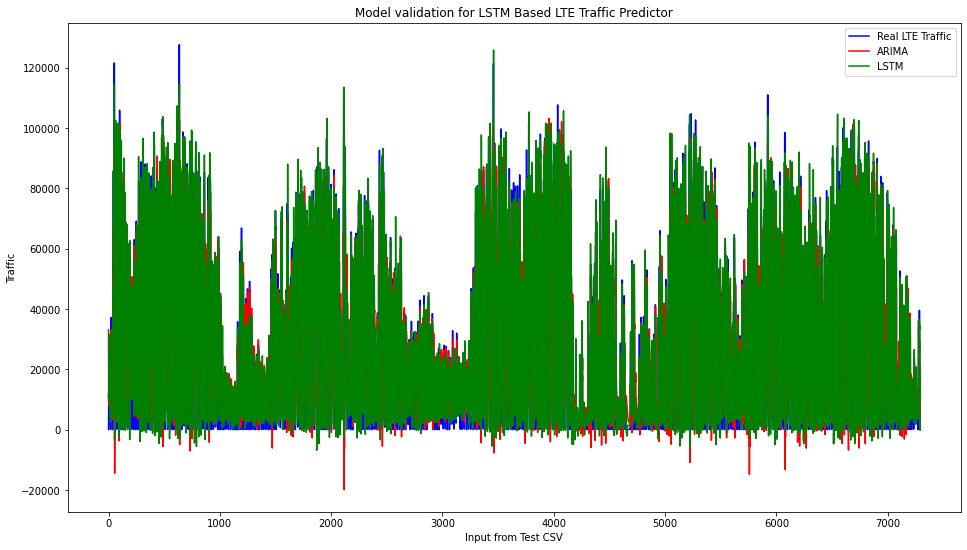

time: 742 ms (started: 2022-02-16 17:20:14 +00:00)


In [ ]:
plt.plot(dataset["DL_bitrate"].values, color='blue', label='Real LTE Traffic')
plt.plot(final.values, color='red', label='ARIMA')
plt.plot(predicts, color='green', label='LSTM')
plt.title('Model validation for LSTM Based LTE Traffic Predictor')
plt.xlabel('Input from Test CSV')
plt.ylabel('Traffic')
plt.legend()
plt.show()
plt.show()

In [ ]:
df_pred_timeseries = {'Actual':dataset["DL_bitrate"].values,'ARIMA':final.values}
df_pred_timeseries = pd.DataFrame(df_pred_timeseries)
df_pred_timeseries['LSTM'] = predicts
df_pred_timeseries
# tr=pd.DataFrame(dataset["DL_bitrate"].values)
# tr

Actual         ARIMA          LSTM
0         21  33178.997922  10513.654758
1       7651   8195.041047  12338.960141
2       7651  15900.084989   9765.492338
3      10017  13720.162589  25536.882154
4      10017  17234.153902  21091.137817
...      ...           ...           ...
7287   21320  28372.724168  28233.096542
7288   21320  13610.024896  12445.395134
7289   21320  17742.387494  19765.015441
7290      90  16141.023117   -210.693459
7291      90    393.754523   2422.416870

[7292 rows x 3 columns]

time: 57.4 ms (started: 2022-02-16 18:06:42 +00:00)


In [ ]:
fig = px.line(df_pred_timeseries)
fig.show()

time: 957 ms (started: 2022-02-16 18:07:27 +00:00)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

mse1 = mean_squared_error(y_test, predicts)
r21 = r2_score(y_test, predicts)
mae1 = mean_absolute_error(y_test, predicts)
print("LSTM Mean Squared Error: ", math.sqrt(mse1))
print("LSTM R2 Squared Error: ", r21)
print("LSTM Mean Absolute Error: ", mae1)

r2 = r2_score(dataset["DL_bitrate"].values, results.fittedvalues)
mse = mean_squared_error(dataset["DL_bitrate"].values, results.fittedvalues)
mae = mean_absolute_error(dataset["DL_bitrate"].values, results.fittedvalues)
print("ARIMA R2 Squared Error: ", r2)
print("ARIMA Mean Squared Error: ", math.sqrt(mse))
print("ARIMA Mean Absolute Error: ", mae)


LSTM Mean Squared Error:  8432.295483069554
LSTM R2 Squared Error:  0.9212533919114367
LSTM Mean Absolute Error:  5494.576287584597
ARIMA R2 Squared Error:  0.6075837770247863
ARIMA Mean Squared Error:  18823.62945829782
ARIMA Mean Absolute Error:  12677.02792008072
time: 61.4 ms (started: 2022-02-16 17:18:08 +00:00)
